<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >INTRODUCTION|</span></b>


One of the biggest frustrations these days is flight delays. In the following dataset we have information on US domestic flights between January-June 2024 with variables such as: when the flights depart, the scheduled and actual arrival time, how long they are delayed, reasons for the delay, etc.

The dataset is comprehensive, with 3,461,319 entries and 23 columns, detailing national flights within the US for the period from January to June 2024.



<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >SUMMARY|</span></b>

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #049#0A1172; font-size:100%; text-align:left">


* [Step 1 | Overview](#overview)
    - Step 1.1 | Hypotesis
    - Step 1.2 |  Data
    - Step 1.3 | Variables
* [Step 2 | Dataset](#read)
   - Step 2.1 | Libraries
   - Step 2.2 | Dataset Information
        - Step 2.2 | Dataset Information | Treatment of Nulls
    - Step 2.3 | Statistics for Numerical Variables
    - Step 2.4 | Statistics for Categorical Variables
* [Step 3 | Data Analysis](#data)
    - Step 3.1 | Univariante Analysis
        - Step 3.3.1 | Univariante Analysis | Time Overview
        - Step 3.3.3 | Univariante Analysis | Flights by Airline.
        - Step 3.3.3 | Univariante Analysis | Origin and Destination.
        - Step 3.3.4 | Univariante Analysis | Departure and Arrival Overview.
    - Step 3.2 | Bivariate Analysiss
        - Step 3.3.1 | Univariante Analysis | Period of time Vs Arrival Delay
        - Step 3.3.2 | Univariante Analysis | Airline Vs Arrival Delay
        - Step 3.3.3 | Univariante Analysis | Origin and Destination Vs Arrival Delay
        - Step 3.3.4 | Univariante Analysis | Departure Vs Arrival Delay.
    - Step 3.3 | Outlier Treatment
* [Step 4 | Contrast Hypotesis](#CONTRAST)
* [Step 5 | Conclusion](#CONCLUSION)
    - Step 5.1 | Conclusion | Flights
    - Step 5.2 | Conclusion| Delays.

<a id="overview"></a>
# <p style="background-color:#0A1172; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 1 | Overview</p>


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 1.1 |</span><span style='color:#0492C2; font-size:40%' > HYPOTESIS</span></b>


1. Flights 
- Between Friday and Sunday, as is the beginning of the weekend, there should supposedly be a greater number of flights.
- The most populated cities in the US are New York, Los Angeles and Chicago in that order. The cities with the greatest number of flights should be those 3.
- June and January should be the months with higher number of flights due to seasonality (winter & christmas season and summer season), while February should be the month with lowest air traffic as there is no festive.

2. Delays
- Delays are more frequent on certain days from Friday to Sunday, when air traffic is expected higher.
- At the end of the day, flights leave with a higher number of minutes of delay, as delays from other flights are accumulated.
- More than 50% of the flights should have less than 30min. Only exceptional cases such weather delays, nas delay, carrier delay can cause a delay higher than 30min.
- Each airline has different operational or assignment processes. Therefore, there will be companies that have a higher volume of delays than others.




<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 1.2 |</span><span style='color:#0492C2; font-size:40%' > DATA</span></b>

The Raw data has been taken from Bureau of Transportation Statistics from US Department of Transportation.

https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 1.3 |</span><span style='color:#0492C2; font-size:40%' > VARIABLES</span></b>

| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __MONTH__ | Month of the Year |                   
| __DAY_OF_MONTH__ | The day of the month on which the flight took place, represented by an integer from 1 to 31 |
| __DAY_OF_WEEK__ | The day of the week on which the flight took place. |
| __OP_UNIQUE_CARRIER__ | Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years. |                     
| __ORIGIN_CITY_NAME__ | Origin Airport, City Name. |  
| __DEST_CITY_NAME__ | Destination Airport, City Name |                      
| __CRS_DEP_TIME__ | The scheduled departure time of the flight, (local time: hhmm) |
| __DEP_TIME__ |  Actual Departure Time (local time: hhmm) |
| __DEP_DELAY__ |  Difference in minutes between scheduled and actual departure time. Early departures show negative numbers. |
| __DEP_DELAY_NEW__ | Difference in minutes between scheduled and actual departure time. Early departures set to 0.   |
| __DEP_DEL15__ | Departure Delay Indicator, 15 Minutes or More (1=Yes)   |                
| __TAXI_OUT__ | Taxi Out Time, in Minutes |              
| __TAXI_IN__ | Taxi In Time, in Minutes |                      
| __CRS_ARR_TIME__ | The scheduled arrival time of the flight (local time: hhmm) |
| __ARR_TIME__ | Actual Arrival Time (local time: hhmm) |
| __ARR_DELAY__ | Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers. |
| __ARR_DELAY_NEW__ | Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.	 |
| __ARR_DEL15__ | Arrival Delay Indicator, 15 Minutes or More (1=Yes) 	 |
| __CARRIER_DELAY__ | Carrier Delay, in Minutes | 
| __WEATHER_DELAY__ | Weather Delay, in Minutes | 
| __NAS_DELAY__ | National Air System Delay, in Minutes | 
| __SECURITY_DELAY__ | 	Security Delay, in Minutes | 
| __LATE_AIRCRAYFT_DELA__ | Late Aircraft Delay, in Minutes | 

<a id="read"></a>
# <p style="background-color:#0A1172; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 2 | DATASET</p>


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 2.1 |</span><span style='color:#0492C2; font-size:40%' > LIBRARIES</span></b>

In [9]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 2.2 |</span><span style='color:#0492C2; font-size:40%' > DATASET INFORMATION</span></b>

In [10]:
files = ["C:/Users/marta/Downloads/EDA/Datos/january.csv", "C:/Users/marta/Downloads/EDA/Datos/february.csv","C:/Users/marta/Downloads/EDA/Datos/march.csv", "c:/Users/marta/Downloads/EDA/Datos/april.csv", "c:/Users/marta/Downloads/EDA/Datos/may.csv", "C:/Users/marta/Downloads/EDA/Datos/june.csv"]
dfs = [pd.read_csv(data, sep=";") for data in files]
df_flights = pd.concat(dfs, ignore_index=True)

In [11]:
df_flights.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,January,1,Monday,9E,"Albany, NY","New York, NY",700,650.0,-10.0,0.0,...,820,737.0,-43.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,January,1,Monday,9E,"Alexandria, LA","Atlanta, GA",600,555.0,-5.0,0.0,...,850,821.0,-29.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,January,1,Monday,9E,"Alexandria, LA","Atlanta, GA",1631,1620.0,-11.0,0.0,...,1917,1851.0,-26.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,January,1,Monday,9E,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",600,558.0,-2.0,0.0,...,832,757.0,-35.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,January,1,Monday,9E,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1231,1240.0,9.0,9.0,...,1450,1437.0,-13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [12]:
df_flights.tail()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN_CITY_NAME,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
3461314,June,30,Sunday,YX,"Washington, DC","Valparaiso, FL",824,813.0,-11.0,0.0,...,955,1007.0,12.0,12.0,0.0,NaN,NaN,NaN,NaN,NaN
3461315,June,30,Sunday,YX,"Wilmington, NC","Boston, MA",1232,1229.0,-3.0,0.0,...,1442,1444.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
3461316,June,30,Sunday,YX,"Wilmington, NC","New York, NY",1149,1147.0,-2.0,0.0,...,1329,1328.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3461317,June,30,Sunday,YX,"Wilmington, NC","New York, NY",1849,2200.0,191.0,191.0,...,2029,2337.0,188.0,188.0,1.0,0.0,126.0,0.0,0.0,62.0
3461318,June,30,Sunday,YX,"Worcester, MA","New York, NY",1340,NaN,NaN,NaN,...,1458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Detect nulls and values ​​that may cause errors in the future
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3461319 entries, 0 to 3461318
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                object 
 1   DAY_OF_MONTH         int64  
 2   DAY_OF_WEEK          object 
 3   OP_UNIQUE_CARRIER    object 
 4   ORIGIN_CITY_NAME     object 
 5   DEST_CITY_NAME       object 
 6   CRS_DEP_TIME         int64  
 7   DEP_TIME             float64
 8   DEP_DELAY            float64
 9   DEP_DELAY_NEW        float64
 10  DEP_DEL15            float64
 11  TAXI_OUT             float64
 12  TAXI_IN              float64
 13  CRS_ARR_TIME         int64  
 14  ARR_TIME             float64
 15  ARR_DELAY            float64
 16  ARR_DELAY_NEW        float64
 17  ARR_DEL15            float64
 18  CARRIER_DELAY        float64
 19  WEATHER_DELAY        float64
 20  NAS_DELAY            float64
 21  SECURITY_DELAY       float64
 22  LATE_AIRCRAFT_DELAY  float64
dtypes: float64(15), int64(3), object

- The dataset contains 3,461,319 entries (rows) and 23 columns.
- The columns are of different data types:
   - integer (int64 (3))
   - float (float64(15))
   - object (usually string or categorical data(5)).

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 2.2.1 |</span><span style='color:#0492C2; font-size:40%' > DATASET INFORMATION |</span><span style='color:#63C5DA; font-size:35%' > Treatment of nulls</span></b>

In [14]:
# Check how many nulls there are and in which variables are located.
df_flights.isnull().sum()

MONTH                        0
DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
ORIGIN_CITY_NAME             0
DEST_CITY_NAME               0
CRS_DEP_TIME                 0
DEP_TIME                 46761
DEP_DELAY                46959
DEP_DELAY_NEW            46959
DEP_DEL15                46959
TAXI_OUT                 48360
TAXI_IN                  49512
CRS_ARR_TIME                 0
ARR_TIME                 49510
ARR_DELAY                57854
ARR_DELAY_NEW            57854
ARR_DEL15                57854
CARRIER_DELAY          2712672
WEATHER_DELAY          2712672
NAS_DELAY              2712672
SECURITY_DELAY         2712672
LATE_AIRCRAFT_DELAY    2712672
dtype: int64

With the above information we can see that:
-  __`cancelled`__ flights dont have __`arriv_time`__ and neither __`arr_delay`__. Therefore this value as zero
- All the flights that doesn't have  __`arr_delay`__ time or hasn´t been  __`cancelled`__, don´t have a reason for delay. TTherefore this  value as zero

With that said, we will proceed to change NaN to zero

In [15]:
# Replace all NaN with cero
df_flights.fillna(0, inplace=True)
# Rename colums to lowercase
df_flights.columns = df_flights.columns.str.lower()


df_flights.head()

,month,day_of_month,day_of_week,op_unique_carrier,origin_city_name,dest_city_name,crs_dep_time,dep_time,dep_delay,dep_delay_new,...,crs_arr_time,arr_time,arr_delay,arr_delay_new,arr_del15,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,January,1,Monday,9E,"Albany, NY","New York, NY",700,650.0,-10.0,0.0,...,820,737.0,-43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,January,1,Monday,9E,"Alexandria, LA","Atlanta, GA",600,555.0,-5.0,0.0,...,850,821.0,-29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,January,1,Monday,9E,"Alexandria, LA","Atlanta, GA",1631,1620.0,-11.0,0.0,...,1917,1851.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,January,1,Monday,9E,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",600,558.0,-2.0,0.0,...,832,757.0,-35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,January,1,Monday,9E,"Allentown/Bethlehem/Easton, PA","Atlanta, GA",1231,1240.0,9.0,9.0,...,1450,1437.0,-13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 2.3 |</span><span style='color:#0492C2; font-size:40%' > STATISTICS FOR NUMERICAL VARIABLE</span></b>

In [16]:
# Summary statistics for numerical variables
df_flights.describe().T

,count,mean,std,min,25%,50%,75%,max
day_of_month,3461319.0,15.727797,8.759213,1.0,8.0,16.0,23.0,31.0
crs_dep_time,3461319.0,1329.339026,494.406515,1.0,906.0,1323.0,1740.0,2400.0
dep_time,3461319.0,1316.248082,530.970994,0.0,858.0,1321.0,1746.0,2400.0
dep_delay,3461319.0,13.521838,57.511146,-96.0,-6.0,-2.0,10.0,3360.0
dep_delay_new,3461319.0,16.642173,56.477424,0.0,0.0,0.0,10.0,3360.0
dep_del15,3461319.0,0.214160,0.410238,0.0,0.0,0.0,0.0,1.0
taxi_out,3461319.0,17.580565,9.903446,0.0,12.0,15.0,20.0,213.0
taxi_in,3461319.0,8.074767,6.719925,0.0,4.0,6.0,10.0,444.0
crs_arr_time,3461319.0,1494.973381,520.384275,1.0,1105.0,1520.0,1929.0,2359.0
arr_time,3461319.0,1443.699460,571.967550,0.0,1033.0,1458.0,1920.0,2400.0


    

- __`day_of_month`__ and __`day_of_week`__ shows the 31st days of the month split it by the 7 days of the week
- __`crs_dep_time`__ and __`crs_arr_time`__   scheduled departure and arrival times of the flights. It´s shown in minutes
- __`dep_delay`__ and __`arr_delay`__: They show the departure and arrival delays in minutes. The values range from negative (early departure or arrival) to positive (late departure or arrival). There are a maximum of 3360 min of __`dep_delay`__ and 3359 min of __`arr_delay`__
-  __`taxi_out`__  is the time in minutes between gate out time and take off (wheels off) timeand. In January they got 213 minutes in total, while the __`taxi_in`__ was of 444 minutes
- In reason of the delay for the flights, we can see that 2972 were due to  __`carrier_delay`__, 1804 as a result of __`weather_delay`__and 1005 because of __`security_delay`__

<a id="basic"></a>

# <b><span style='color:#white; font-size:40%' >Step 2.3 |</span><span style='color:#0492C2; font-size:40%' > STATISTICS FOR CATEGORICAL VARIABLE</span></b></span></b>

In [17]:
#Summary statistics for categorical variable
df_flights.describe(include='object')

,month,day_of_week,op_unique_carrier,origin_city_name,dest_city_name
count,3461319,3461319,3461319,3461319,3461319
unique,6,7,15,337,337
top,June,Friday,WN,"Chicago, IL","Chicago, IL"
freq,611132,518154,712760,173967,173976


- __`op_unique_carrier`__  are airline carrier codes. There are 15 unique carriers in the dataset.
- __`origin_city_name`__, and __`dest_city_name`__ are the number of airports that have been tracking national USA flights from January to June 2024. It shows 337 unique origin airports, the same as the destination.
- Chicago is the city with most __`origin_city_name`__, and __`dest_city_name`__ flights this period.
- The __`month`__ with the highest number of flights is June.
- Friday is __`day_of_week`__ where more flights are taken.

<a id="data"></a>
# <p style="background-color:#0A1172; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 3 | DATA ANALYSIS</p>


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.1 |</span><span style='color:#0492C2; font-size:40%' > UNIVARIATE ANALYSIS</span></b>

On the univariate analysis we can use 2 types of graph based on the data type:

* For numerical data, we can use a histogram to visualize the data distribution. 
* For categorical data, we will use a bar plot to visualize the number of flights of each category.

In [18]:
color = '#0A1172'
 
# Define function for histograms
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('number of flights', fontsize=12)

# Text annotation for percentages, so it will be easier to read the results.
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    total_count = sum(counts) 
    for count, x in zip(counts, bin_centers):
        if count > 0: # only non-zero counts are considered
            percentage = (count / total_count) * 100  # percentages
        plt.text(x, count, f'{percentage:.1f}%', fontsize=fontsize, ha='center')
plt.show()
    



<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.1.1 |</span><span style='color:#0492C2; font-size:40%' > UNIVARIANTE ANALYSIS |</span><span style='color:#63C5DA; font-size:35%' > Time Overview</span></b>

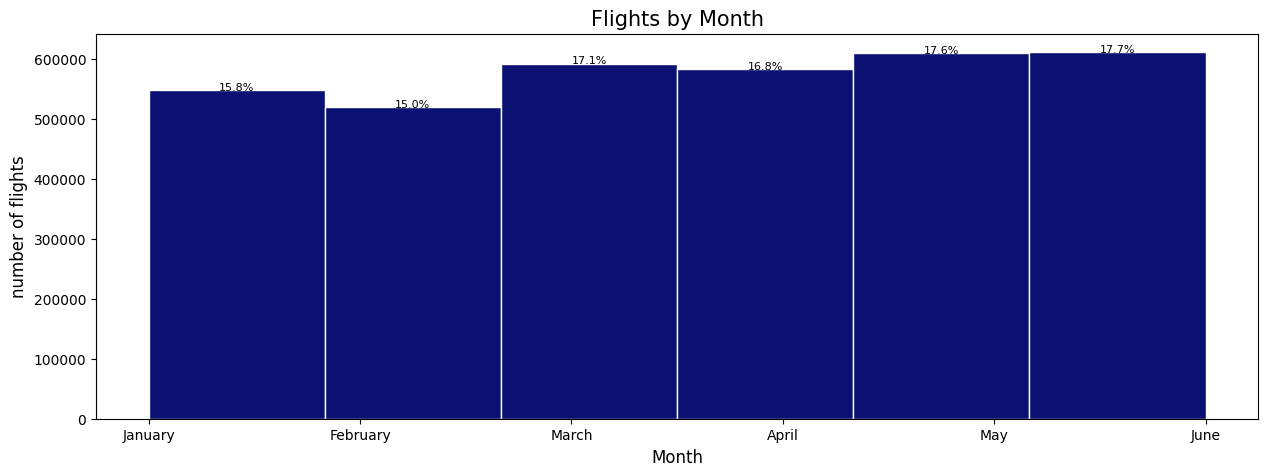

In [19]:
# The day of the month in which the flight took place. 
plot_hist(df_flights['month'], bins=6, title='Flights by Month', xlabel='Month')

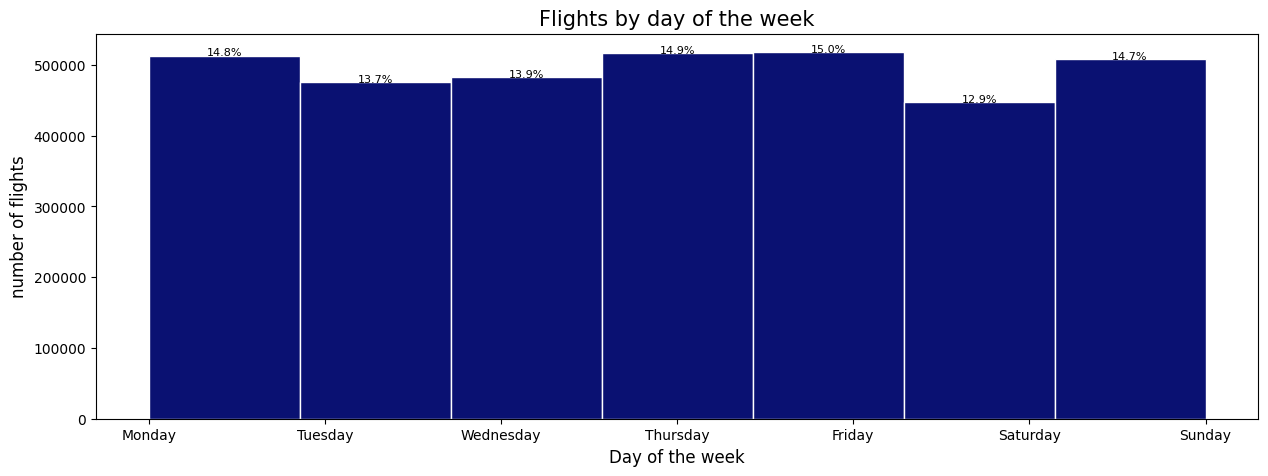

In [20]:
# The month of day of the week in which the flight occurred.
plot_hist(df_flights['day_of_week'], bins=7, title='Flights by day of the week', xlabel='Day of the week')

- __`Month`__  with higher number of flights is June, and February is the month with the lowest flights
    - Something to bare in mind for future analysis, is February has 2-3 days less than the rest of the months, therefore this could impact the negative result of February compare to the rest of the months. In order to be equitative we should com`pare how many flight there are by month on the 28 first days of the month.
    
- Friday and Thursday are the __`day_of_week`__ with higher traffic, while Saturday is day with lower number of flights

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.1.2 |</span><span style='color:#0492C2; font-size:40%' > UNIVARIANTE ANALYSIS |</span><span style='color:#63C5DA; font-size:35%' > Flights by airline</span></b>

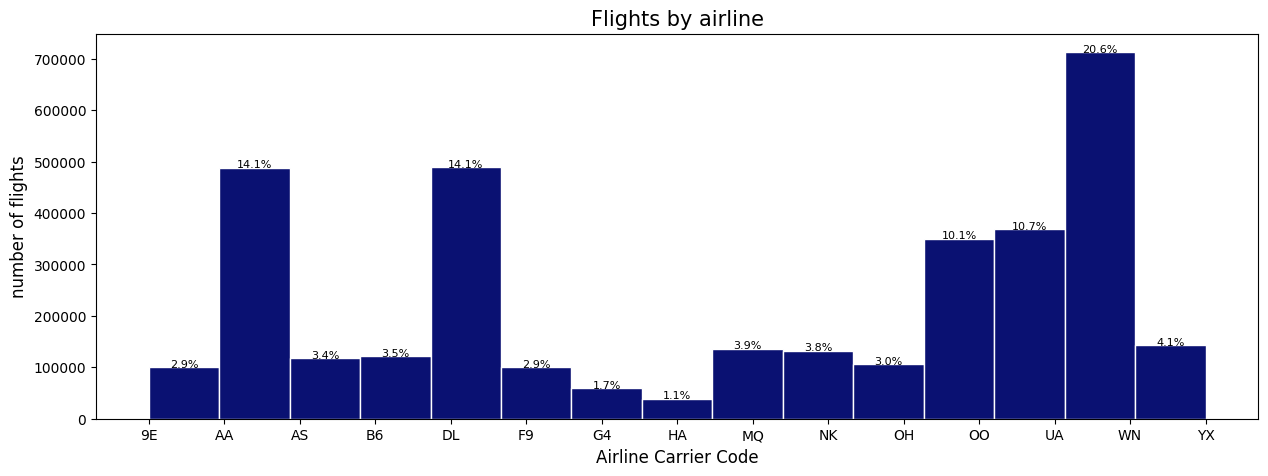

In [21]:
# Representing the airline responsible for the flight.
plot_hist(df_flights['op_unique_carrier'], bins=15, title='Flights by airline', xlabel='Airline Carrier Code')

.
- The __`op_unique_carrier`__ with the codes __WN__ (Southwest Airlines), __DL__ (Delta Air Lines) and __AA__ (American Airlines) operate the most flights during this period of time.




<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.1.3 |</span><span style='color:#0492C2; font-size:40%' > UNIVARIANTE ANALYSIS |</span><span style='color:#63C5DA; font-size:35%' > Origin and Destination </span></b>

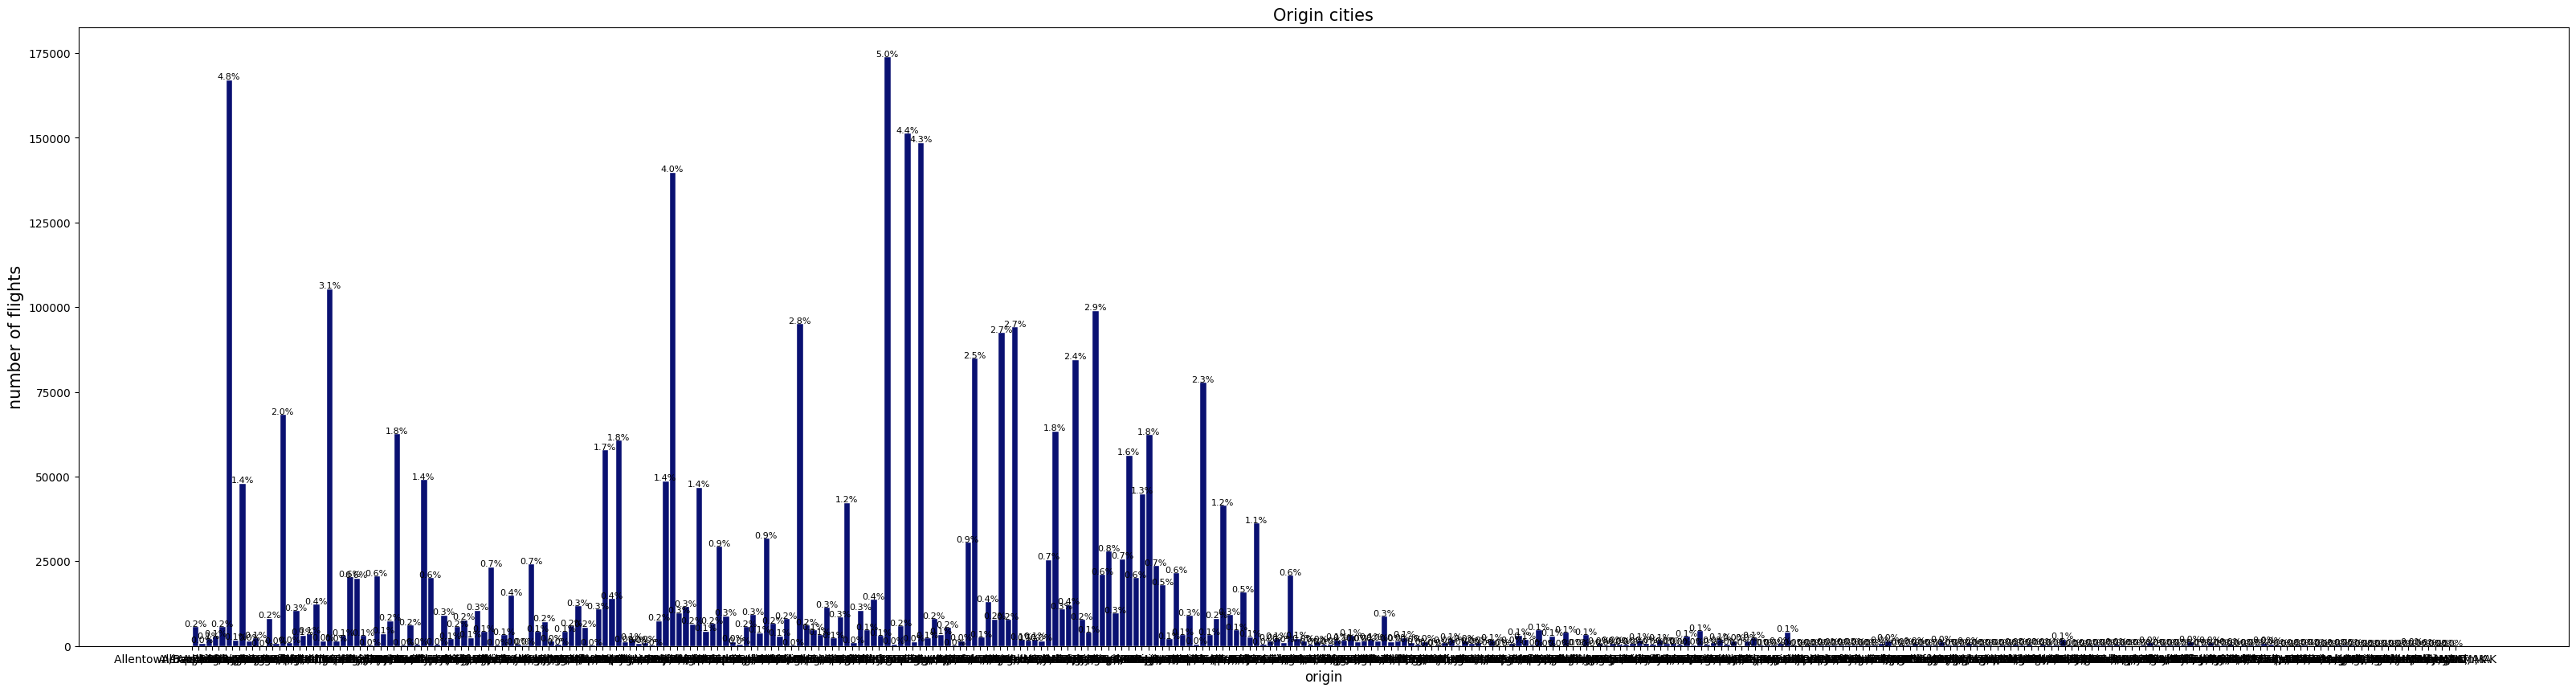

In [22]:
# Number of flights by Origin city.

def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(40,10))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('number of flights', fontsize=15)

# Text annotation for percentages, so it will be easier to read the results.
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    total_count = sum(counts) 
    for count, x in zip(counts, bin_centers):
        if count > 0: # only non-zero counts are considered
            percentage = (count / total_count) * 100  # percentages
        plt.text(x, count, f'{percentage:.1f}%', fontsize=fontsize, ha='center')
plt.show()
    
plot_hist(df_flights['origin_city_name'], bins=337, title='Origin cities', xlabel='origin')


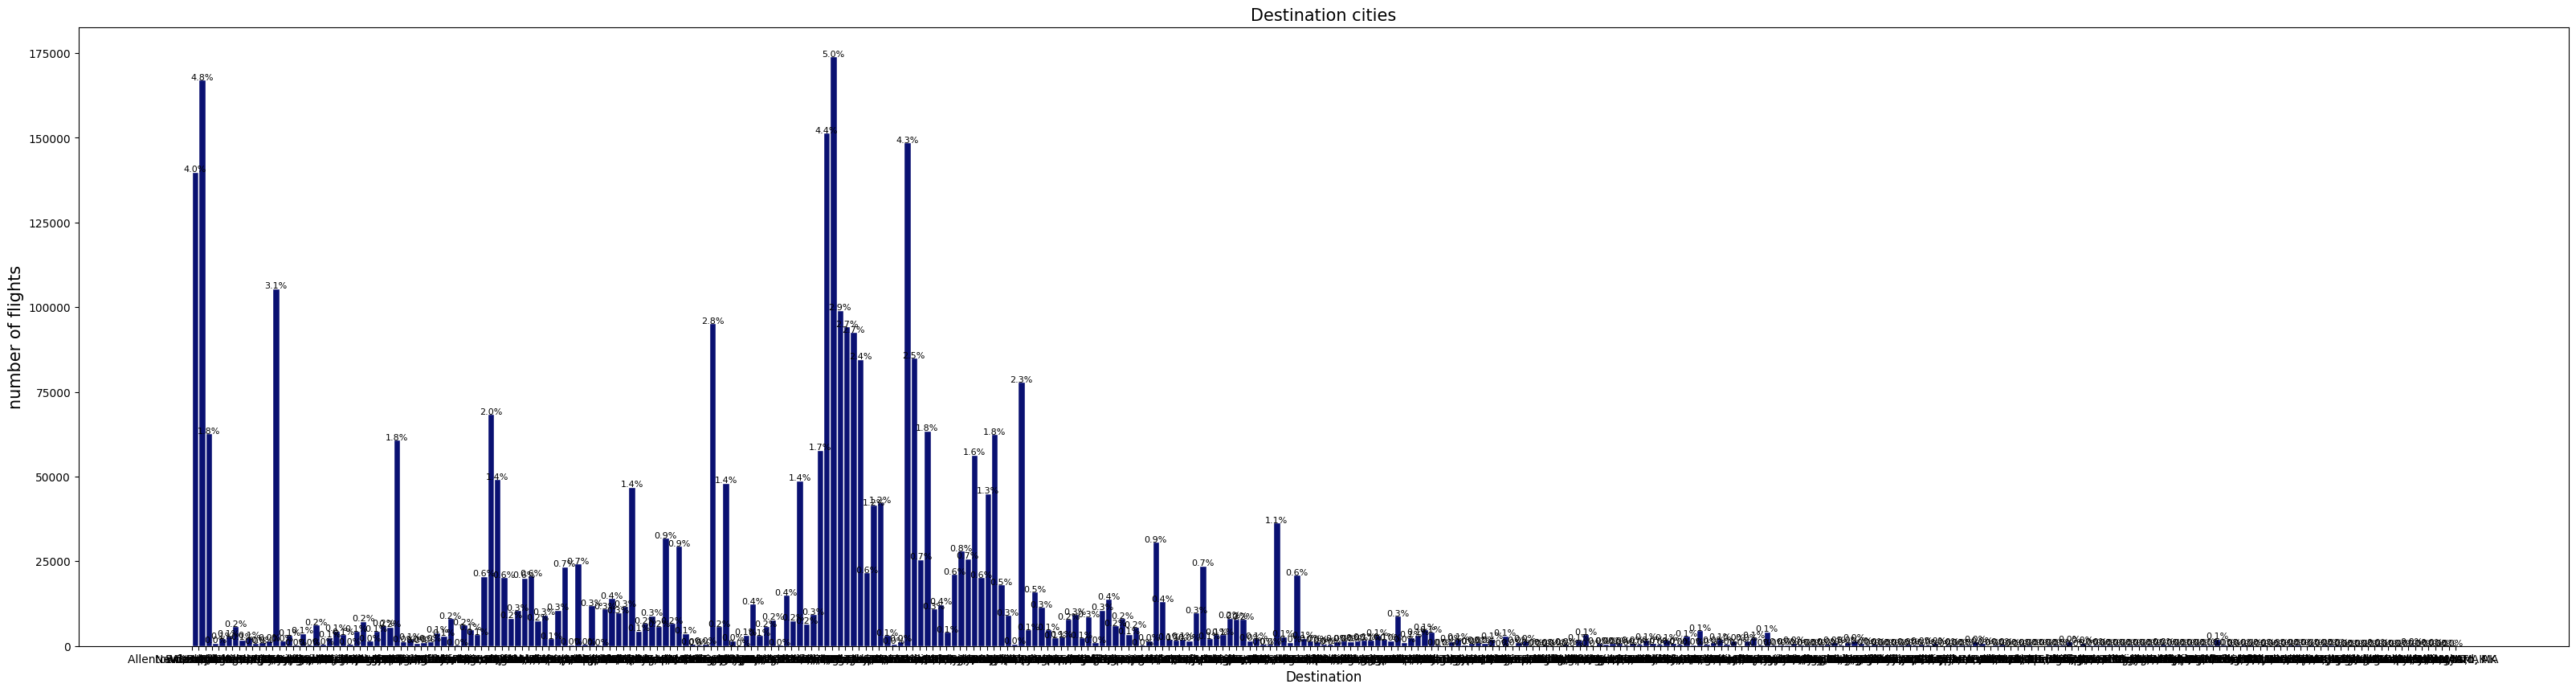

In [23]:
# Number of flights by Destination city.

def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(40,10))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('number of flights', fontsize=15)

# Text annotation for percentages, so it will be easier to read the results.
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    total_count = sum(counts) 
    for count, x in zip(counts, bin_centers):
        if count > 0: # only non-zero counts are considered
            percentage = (count / total_count) * 100  # percentages
        plt.text(x, count, f'{percentage:.1f}%', fontsize=fontsize, ha='center')
plt.show()
    
plot_hist(df_flights['dest_city_name'], bins=337, title='Destination cities', xlabel='Destination')




- __Chicago__ and __Atlanta__ show the higher __`origin_city_name`__  and __`des_city_name`__, being Chicago the city with highest flights




<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.1.4 |</span><span style='color:#0492C2; font-size:40%' > UNIVARIANTE ANALYSIS |</span><span style='color:#63C5DA; font-size:35%' > Departure and Arrival Overview</span></b>

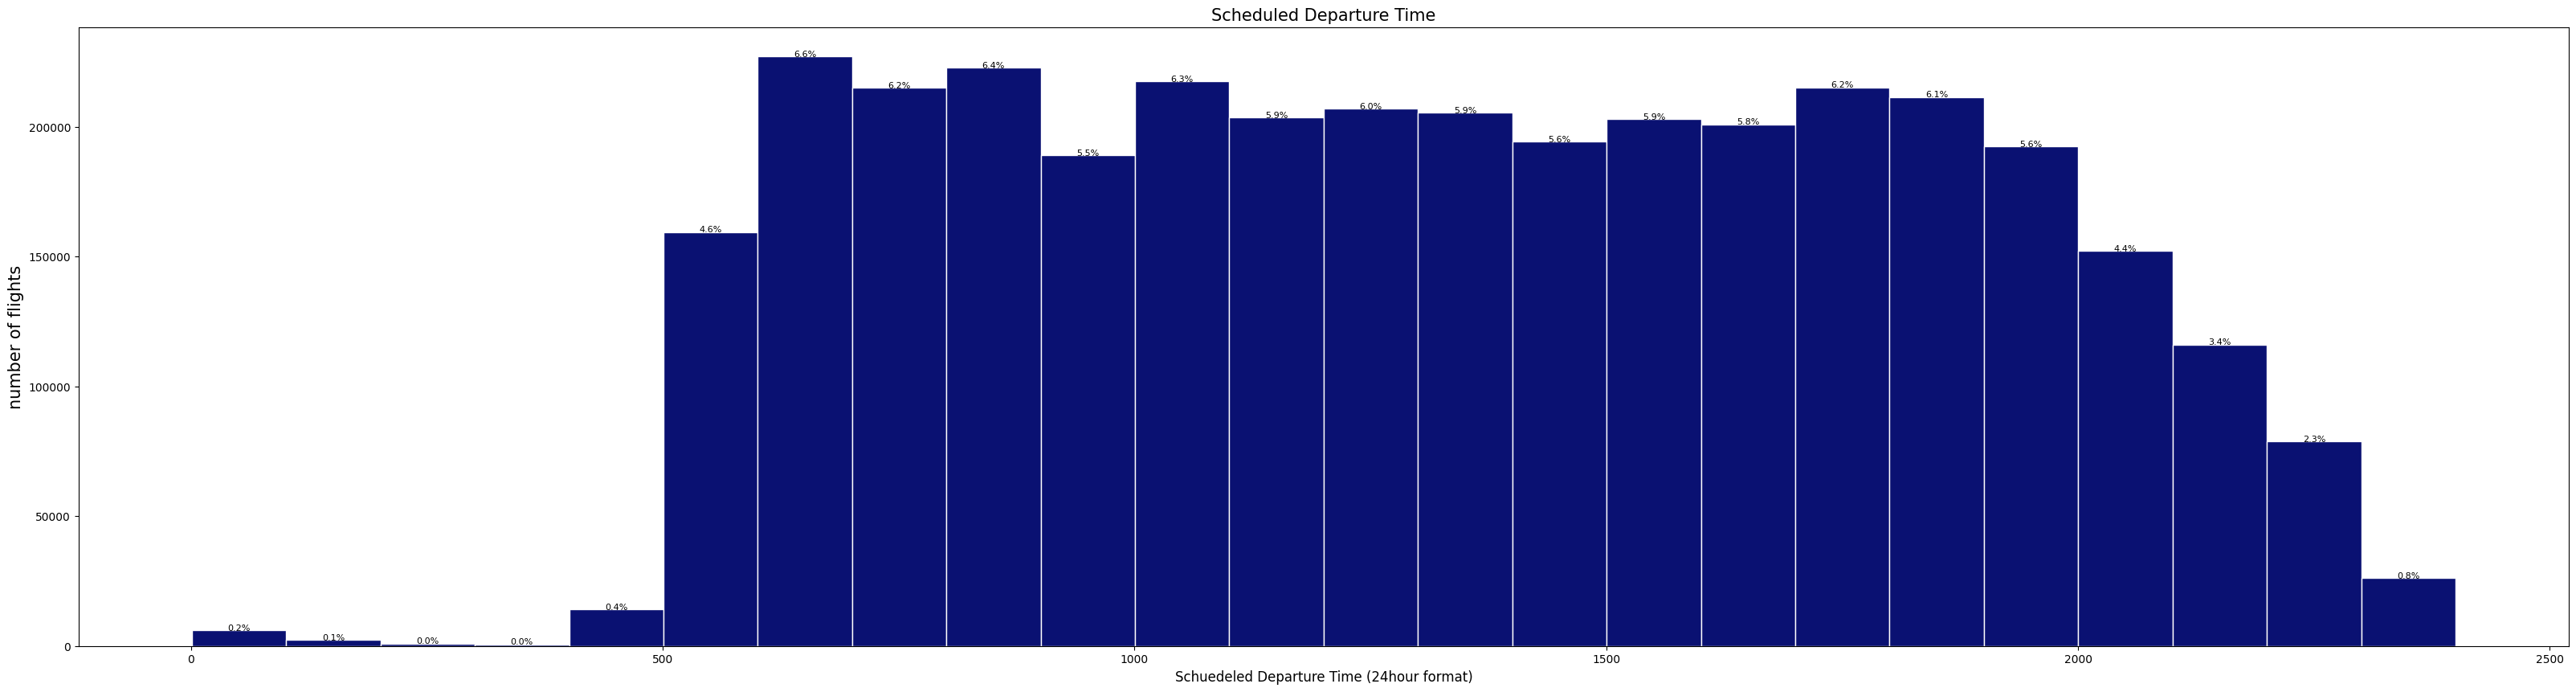

In [24]:
# The hour of the of day of which the flight occurred. (24h format)
plot_hist(df_flights['crs_dep_time'], bins=24, title='Scheduled Departure Time', xlabel='Schuedeled Departure Time (24hour format)')

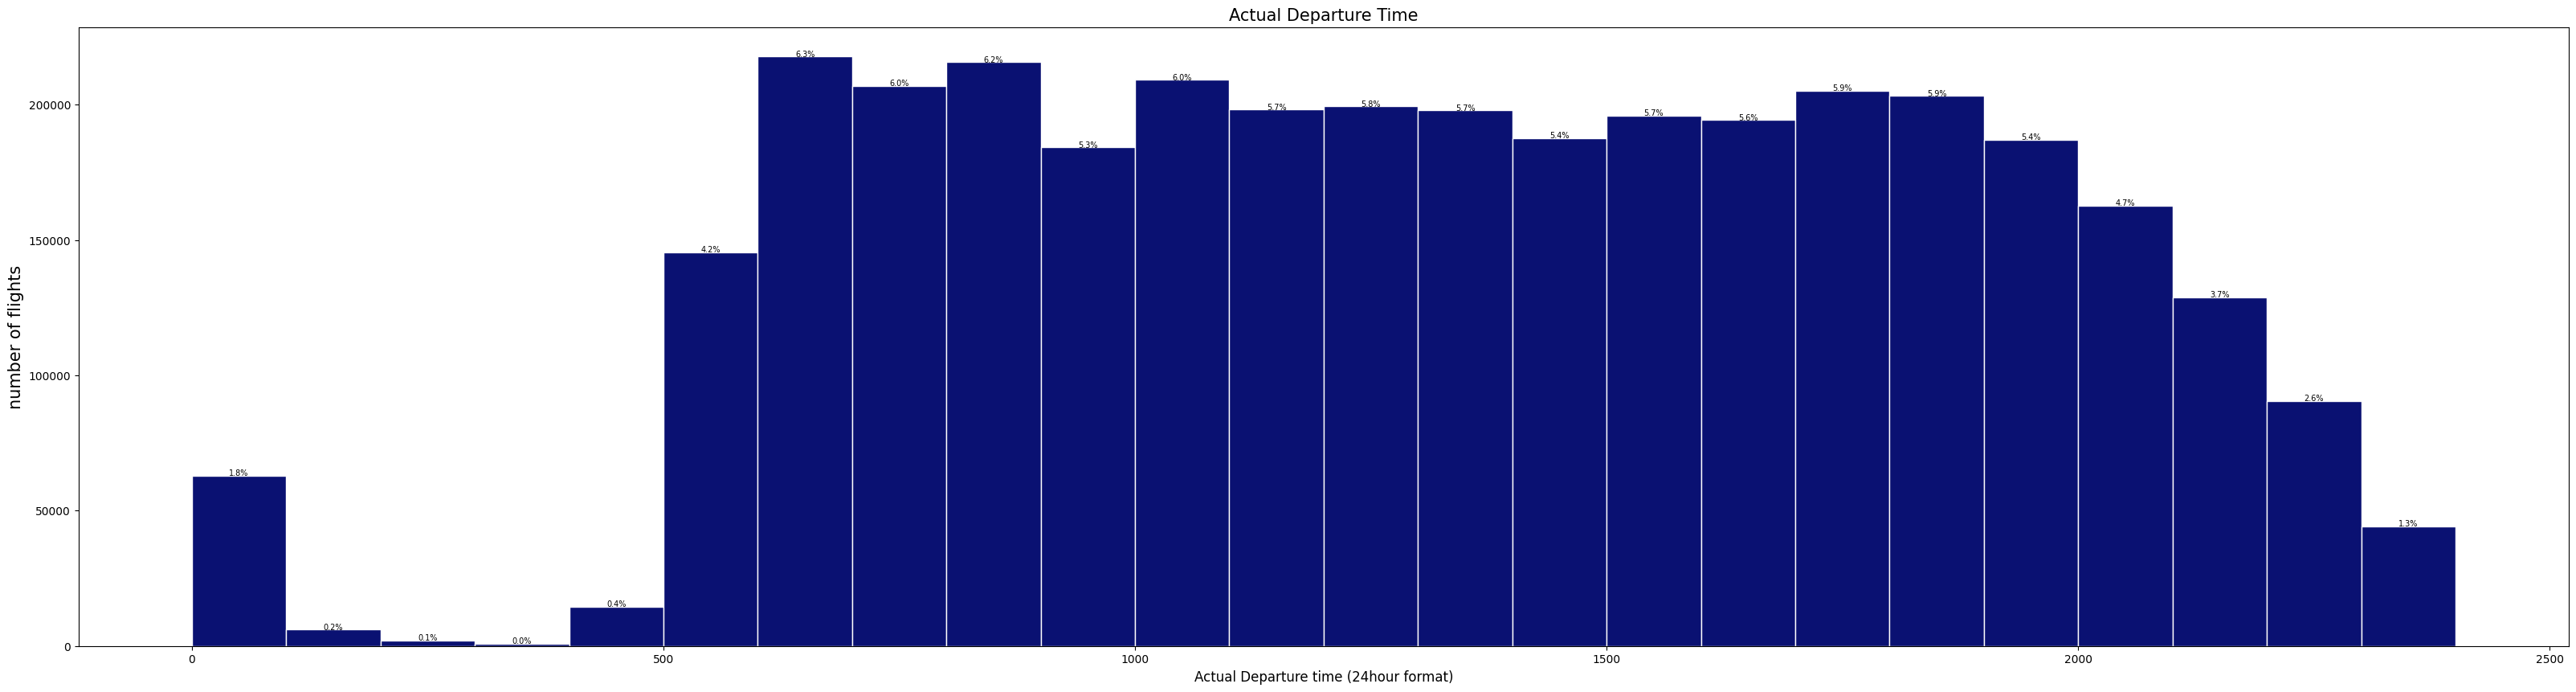

In [25]:
# The actual hour of the departure the flight occurred. (24h format)
plot_hist(df_flights['dep_time'], bins=24, title='Actual Departure Time', xlabel='Actual Departure time (24hour format)', fontsize=7)

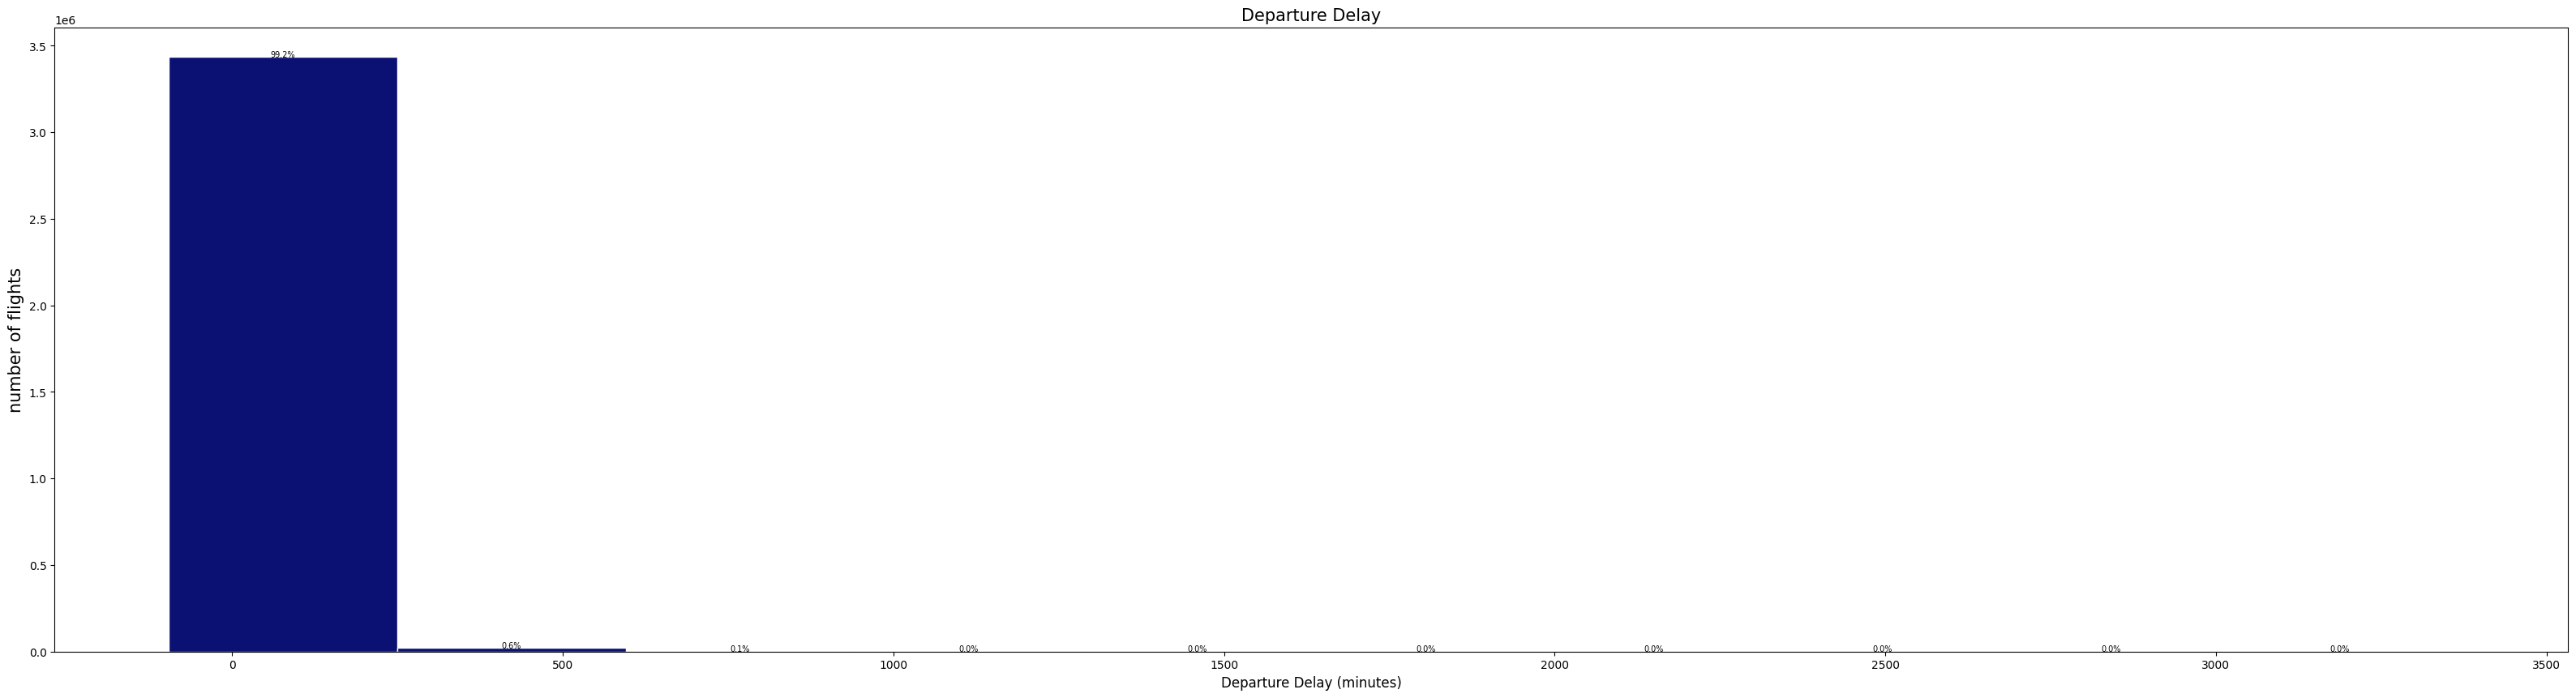

In [26]:
# The delay in flight departure, calculated as the difference (in minutes) between the actual and scheduled departure times. Positive values indicate a delay, while negative values indicate an early departure.
plot_hist(df_flights['dep_delay'], bins=10, title='Departure Delay', xlabel='Departure Delay (minutes)', fontsize=7)

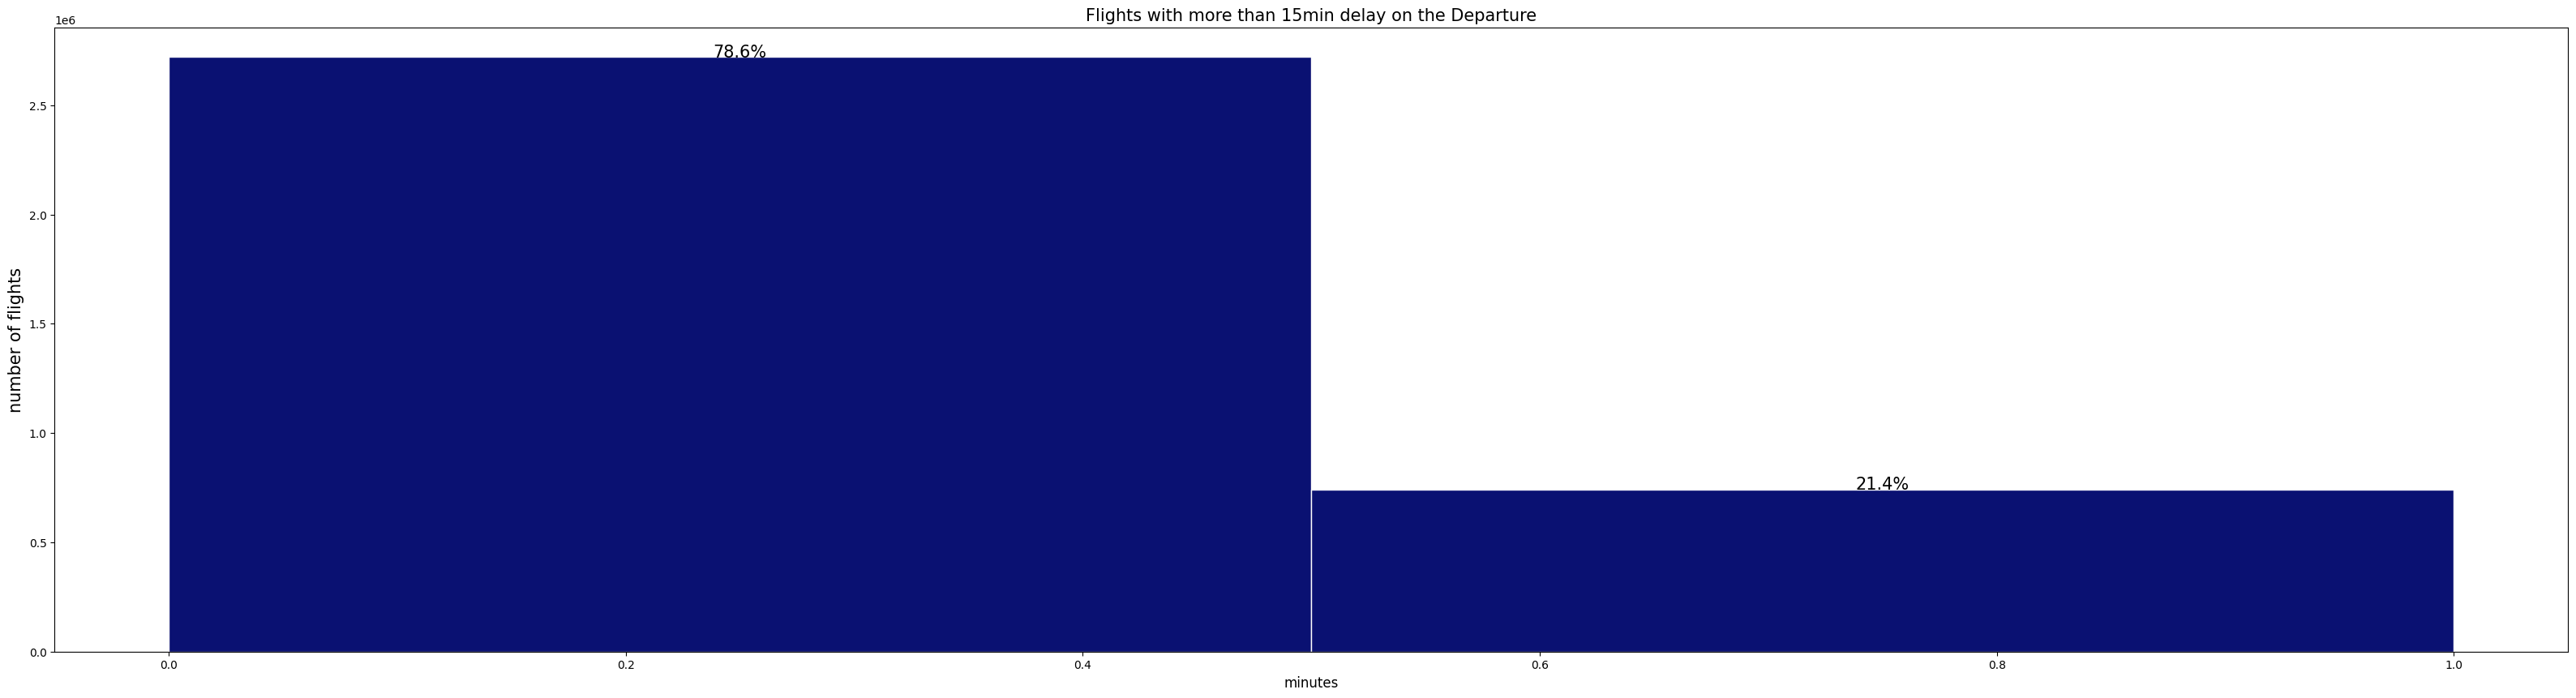

In [27]:
#Flights with more than 15 min delay on the departure.
plot_hist(df_flights['dep_del15'], bins=2, title='Flights with more than 15min delay on the Departure', xlabel='minutes', fontsize=15)

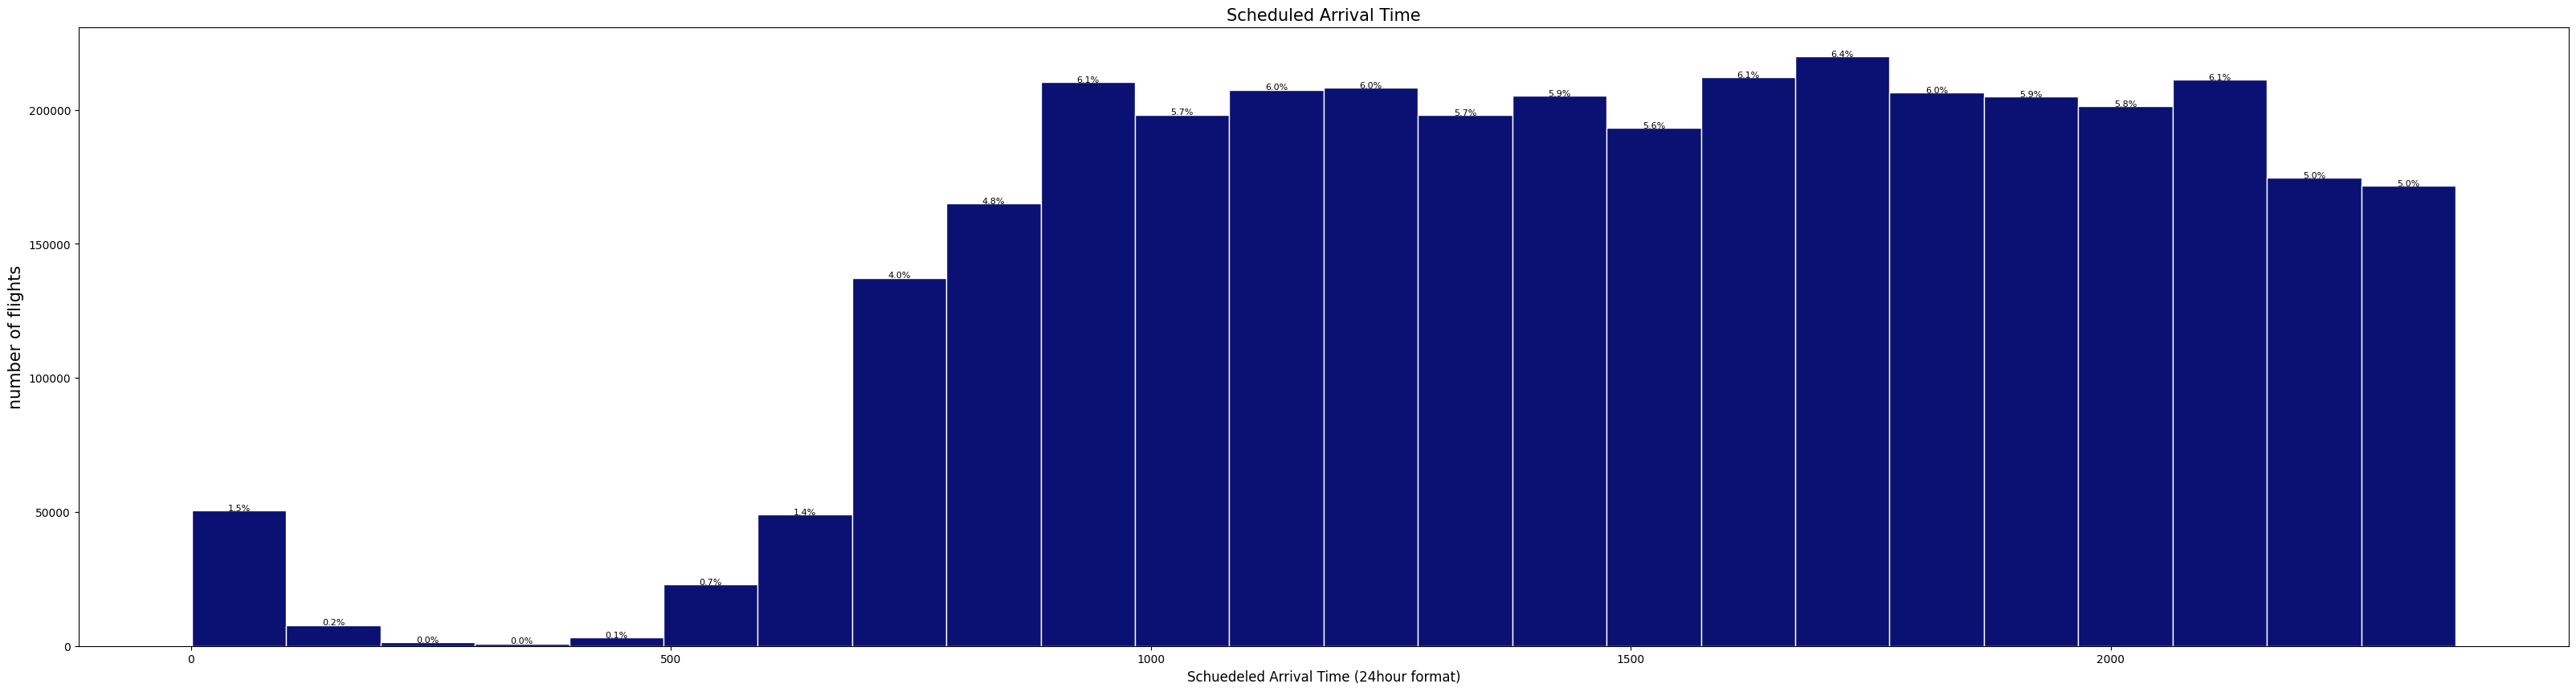

In [28]:

# The hour of the of day of which the flight was scheduled to arrive. (24h format)
plot_hist(df_flights['crs_arr_time'], bins=24, title='Scheduled Arrival Time', xlabel='Schuedeled Arrival Time (24hour format)')

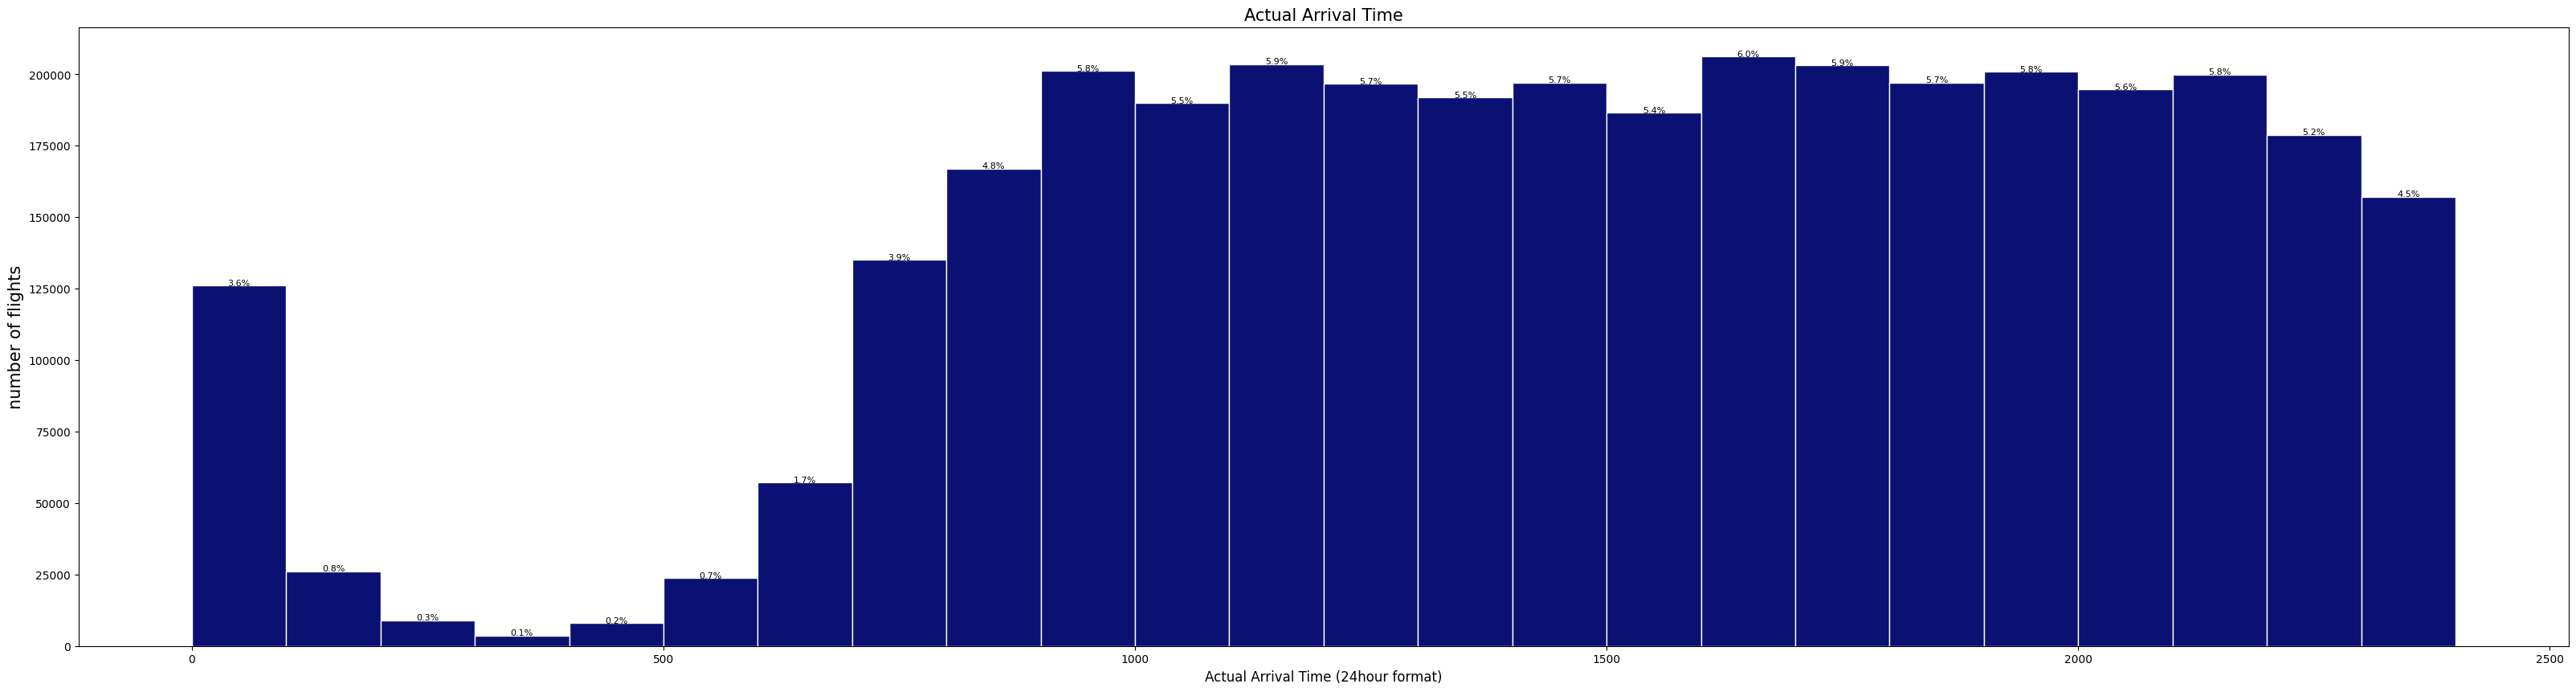

In [29]:
# The hour of the of day of which the flight actually arrived . (24h format)
plot_hist(df_flights['arr_time'], bins=24, title='Actual Arrival Time', xlabel='Actual Arrival Time (24hour format)')

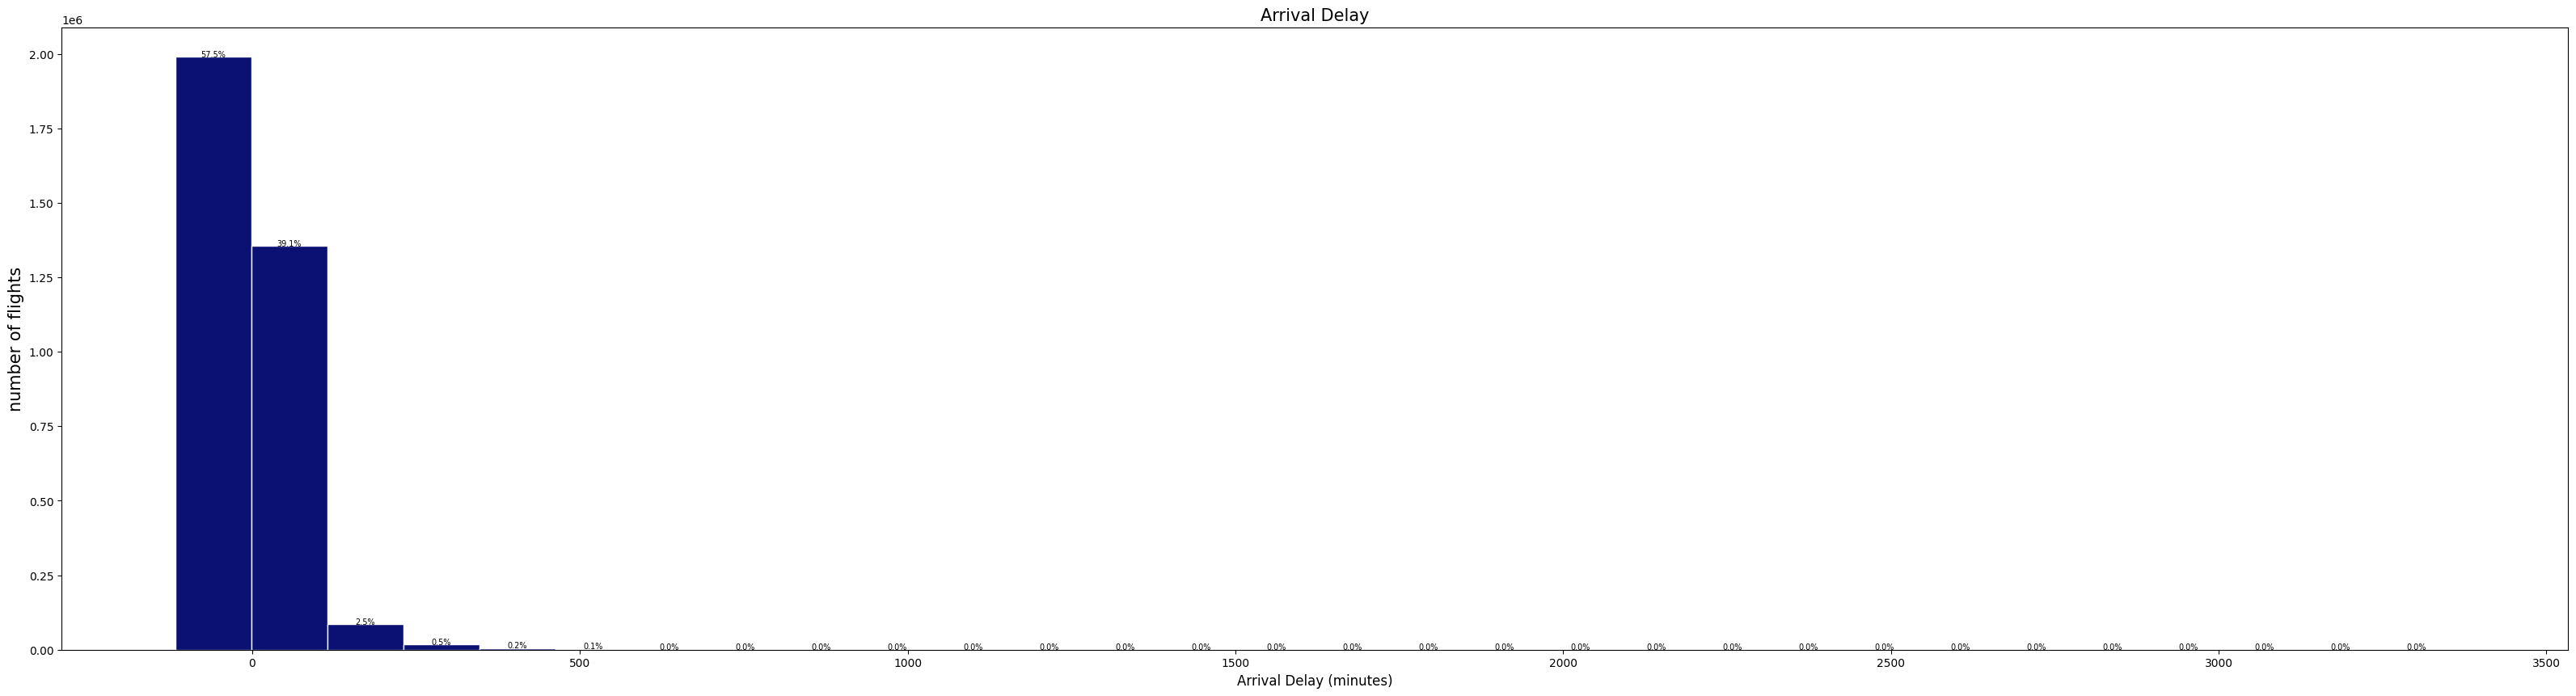

In [30]:
# The arrival delay , calculated as the difference (in minutes) between the actual and scheduled departure times. Positive values indicate a delay, while negative values indicate an early arrival.
plot_hist(df_flights['arr_delay'], bins=30, title='Arrival Delay', xlabel='Arrival Delay (minutes)', fontsize=7)

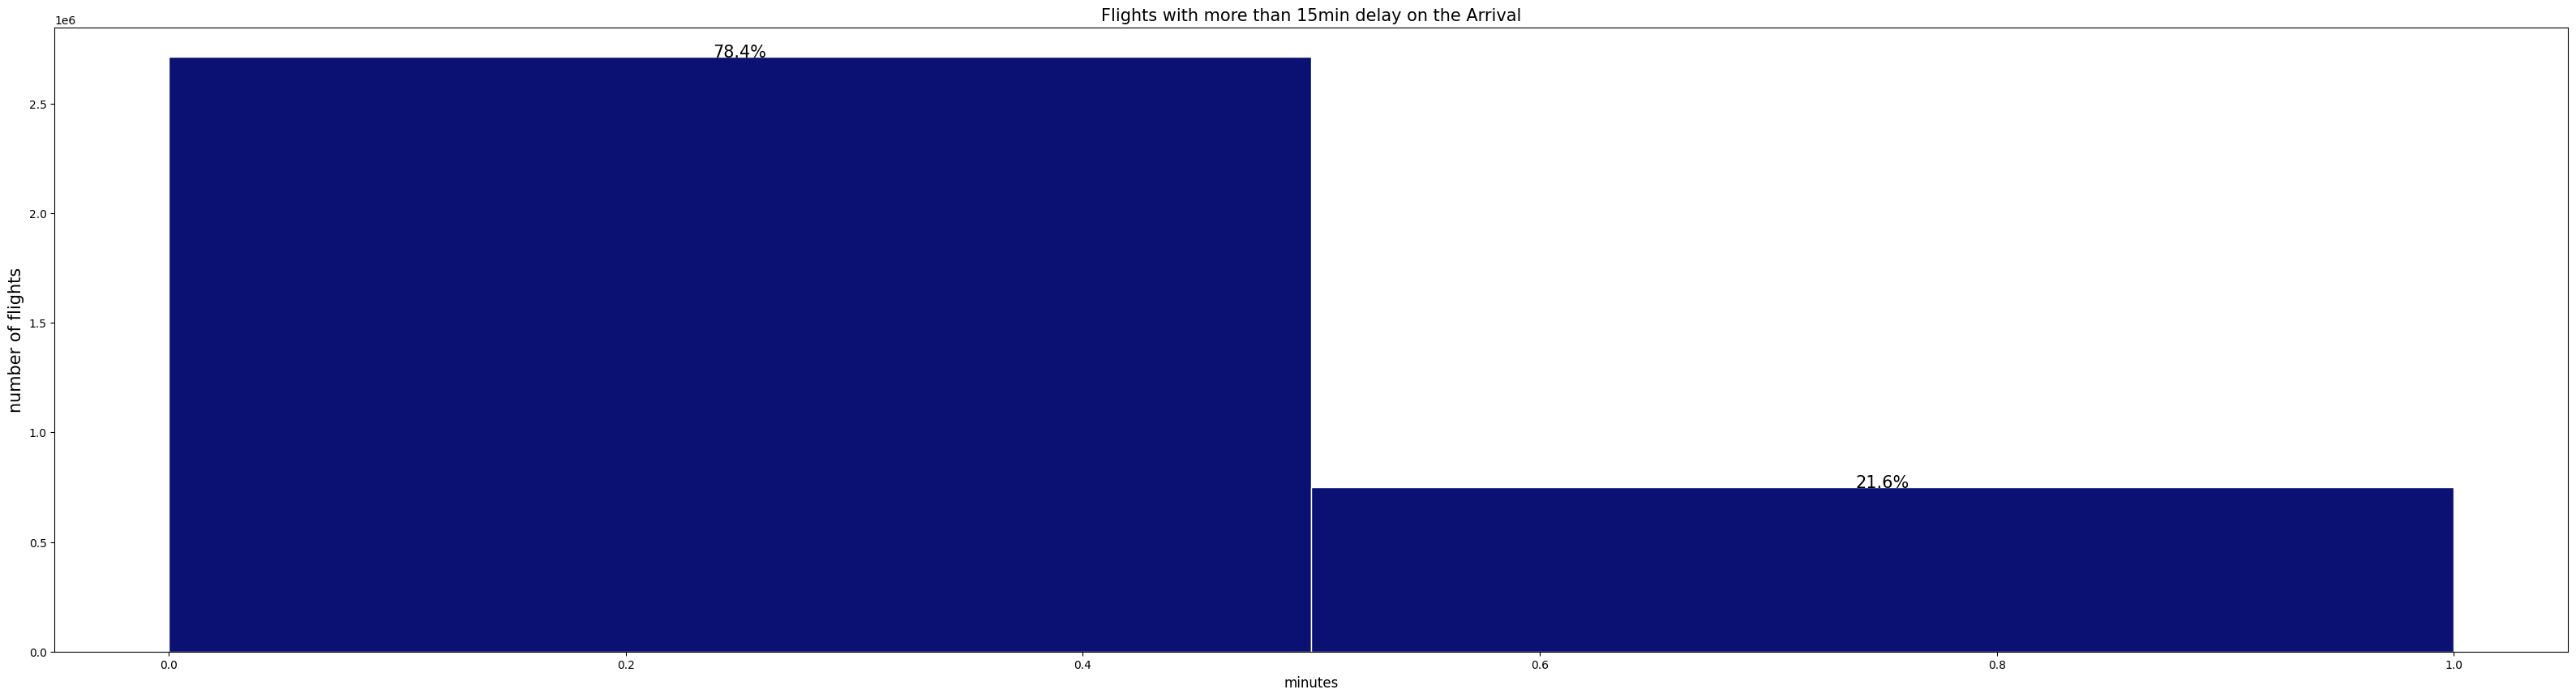

In [31]:
# The arrival delay , calculated as the difference (in minutes) between the actual and scheduled departure times. 
plot_hist(df_flights['arr_del15'], bins=2, title='Flights with more than 15min delay on the Arrival', xlabel='minutes', fontsize=15)

- 7:00 am and 9:00 am are hours with most __`crs_dep_time`__  ,same as __`dep_time`__. However, by the end of the day, there's a a decrease in __`crs_dep_time`__ from 11pm to 2am while the number of __`dep_time`__ see an increase. This might be due to the accumulation delays during the day.
- 5:00 is the hour with most __`crs_arr_time`__  ,while for __`arr_time`__ is 4:00pm. By the end of the day, there's a a decrease in __`crs_arr_time`__ from 10pm to 3am while the number of __`arr_time`__ see an increase. This might be due to the accumulation delays during the day.
- __`dep_del15`__ shows that 79% of flights departure have had less than 15 min delay on the departure, while 21% more than 15 in delay. On the __`arr_del15`__ , we see similar numbers, being 78% for less than 15 min delay and 22% of the flight with more than 15 min delay on the arrival.
- 57% of the flights shows early arrival, al 89% of the flights show earlier depearture than schudeled .




<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.2 |</span><span style='color:#0492C2; font-size:40%' > BIVARIATE ANALYSIS</span></b>

For the bivariate analysis, __`arr_delay`__ will be the column target colum

In [44]:
colors_box = sns.dark_palette("#0492C2", n_colors=7, as_cmap=False)

# Define colormap with different shades of color #8502d1 for scatter plots
colors_scatter = sns.dark_palette("#0492C2", as_cmap=True)

# Define the function to plot scatter plots
def plot_scatter(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(15,5))
    plt.scatter(x, y, c=y, cmap=colors_scatter, s=2)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.colorbar(label=ylabel)
    plt.show()

# Define the function to plot bar
def plot_bar(x, y, title, xlabel, ylabel, fontsize=8):
    plt.figure(figsize=(15,5))
    sns.barplot(x=x, y=y, hue=x, palette=colors_box, legend=False)
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.show()



<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.2.1 |</span><span style='color:#0492C2; font-size:40%' > BIVARIANTE ANALYSIS |</span><span style='color:#63C5DA; font-size:35%' > Period of time Vs Arrival Delay</span></b>

C:\Users\marta\AppData\Local\Temp\ipykernel_28932\2287506161.py:4: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.barplot(x=x, y=y, hue=x, palette=colors_box, legend=False)


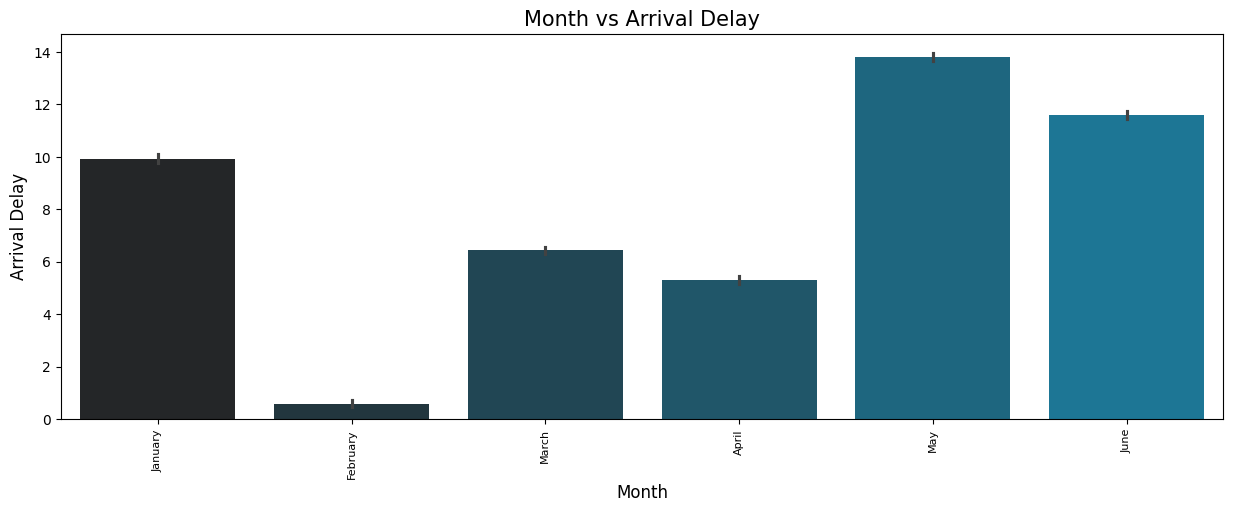

In [53]:
plot_bar(df_flights['month'], df_flights['arr_delay'], 'Month vs Arrival Delay', 'Month', 'Arrival Delay')

__May__ is__ the __`month`__ that show the higher number of delays, while __February__ is the month with the lowest arrival delays.

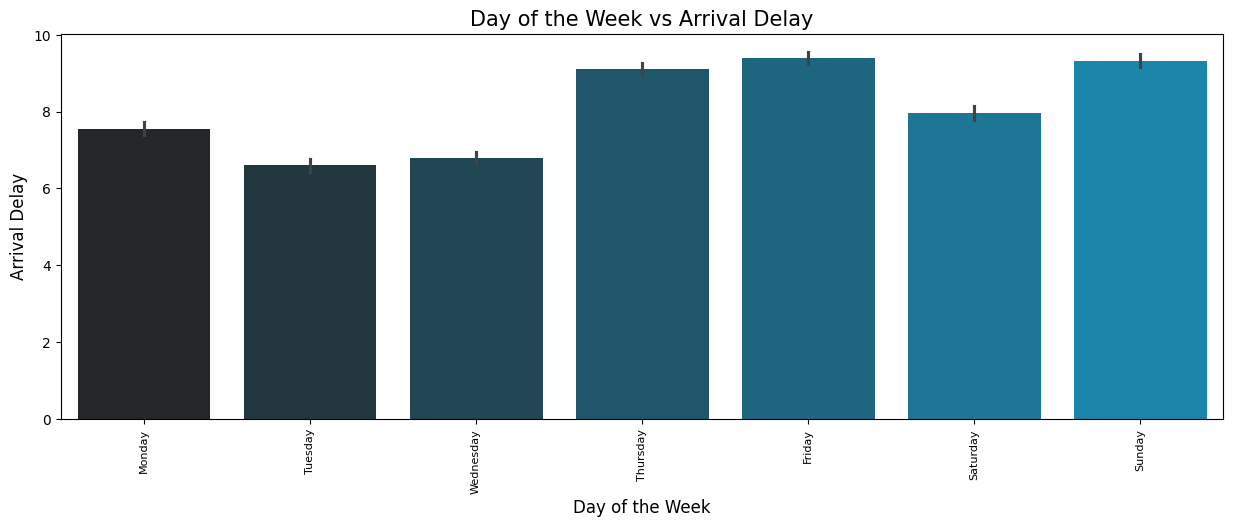

In [46]:
#cambiar a visualizacion a barras
plot_bar(df_flights['day_of_week'], df_flights['arr_delay'], 'Day of the Week vs Arrival Delay', 'Day of the Week', 'Arrival Delay')

__Friday__ and __Sunday__  are the __`day_of_week`__ that show the higher number of delays, while __Tuesday__ is the day with the lowest arrival delays.

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.2.2 |</span><span style='color:#0492C2; font-size:40%' > BIVARIANTE ANALYSIS |</span><span style='color:#63C5DA; font-size:35%' > Carrier Vs Arrival Delay</span></b>

C:\Users\marta\AppData\Local\Temp\ipykernel_28932\2494311242.py:19: UserWarning: 
The palette list has fewer values (7) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=x, y=y, hue=x, palette=colors_box, legend=False)


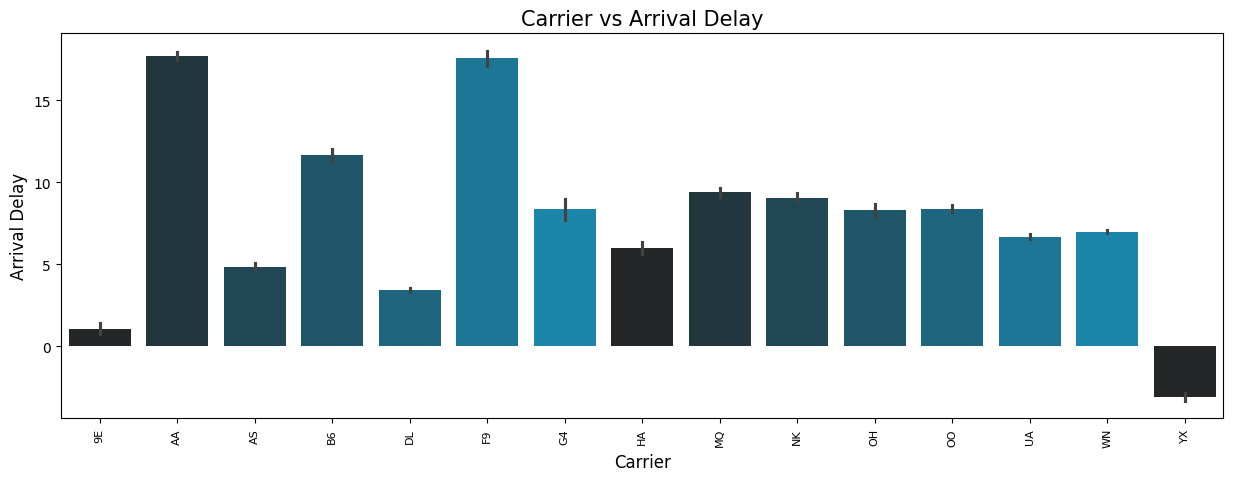

In [47]:
# carrier vs arr_delay
plot_bar(df_flights['op_unique_carrier'], df_flights['arr_delay'], 'Carrier vs Arrival Delay', 'Carrier', 'Arrival Delay')

The __`op_unique_carrier`__ with the codes __F9__(Frontier Airlines), __AA__ (American Airlines), __B6__ (JetBlue Airlines), are the top 3 airlines with higher numnber of arrival delays. On the other hand, __YX__(Republic Airlines), arrives in advance.

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.2.3 |</span><span style='color:#0492C2; font-size:40%' > BIVARIANTE ANALYSIS |</span><span style='color:#63C5DA; font-size:35%' > Origin and Destination Vs Arrival Delay</span></b>

C:\Users\marta\AppData\Local\Temp\ipykernel_28932\2287506161.py:4: UserWarning: 
The palette list has fewer values (7) than needed (337) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=x, y=y, hue=x, palette=colors_box, legend=False)


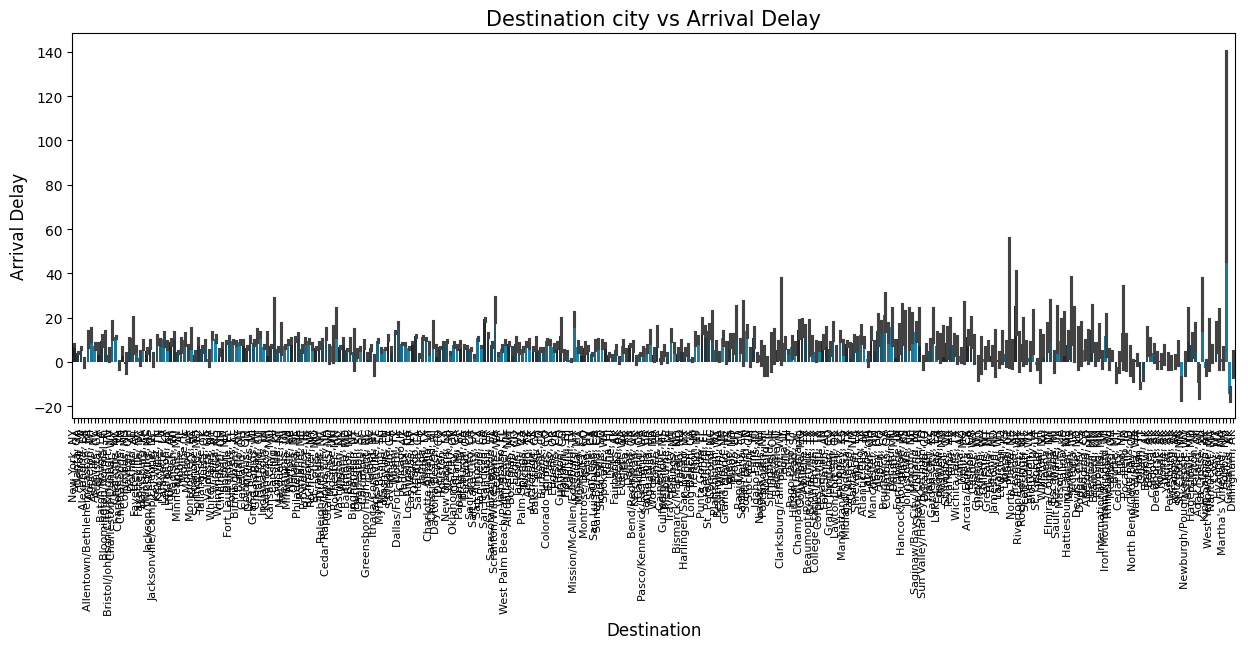

In [51]:
# Destination vs arr_delay
plot_bar(df_flights['dest_city_name'], df_flights['arr_delay'], 'Destination city vs Arrival Delay', 'Destination', 'Arrival Delay')

C:\Users\marta\AppData\Local\Temp\ipykernel_28932\2494311242.py:19: UserWarning: 
The palette list has fewer values (7) than needed (337) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=x, y=y, hue=x, palette=colors_box, legend=False)


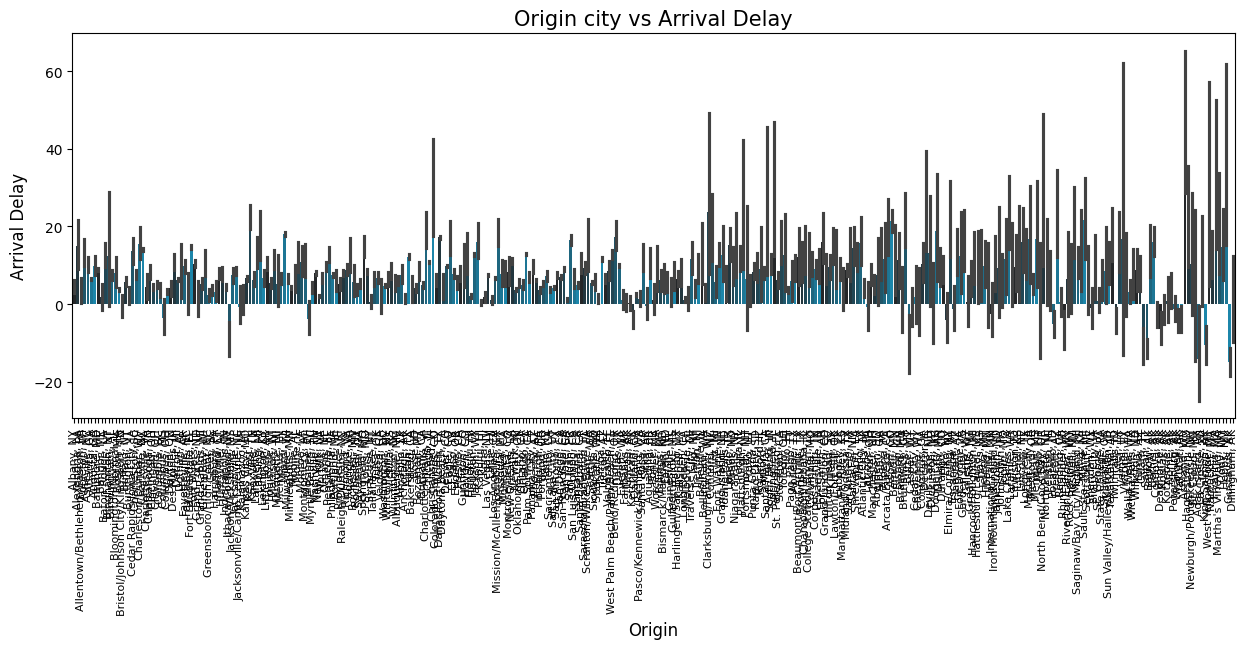

In [49]:
# carrier vs arr_delay
plot_bar(df_flights['origin_city_name'], df_flights['arr_delay'], 'Origin city vs Arrival Delay', 'Origin', 'Arrival Delay')

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.2.4 |</span><span style='color:#0492C2; font-size:40%' > BIVARIANTE ANALYSIS |</span><span style='color:#63C5DA; font-size:35%' > Departure Vs Arrival Delay</span></b>

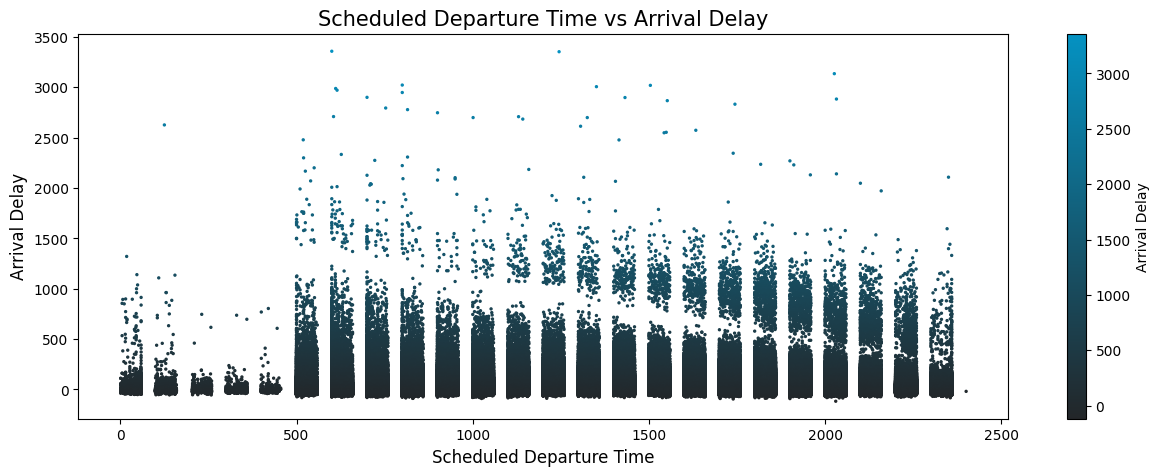

In [38]:
# crs_dep_time vs arr_delay
plot_scatter(df_flights['crs_dep_time'], df_flights['arr_delay'], 'Scheduled Departure Time vs Arrival Delay', 'Scheduled Departure Time', 'Arrival Delay')

- There is a greater dispersion of delays as the day progresses. Flights scheduled later on the day tend to have longer delays (This may be due to the accumulation of delays throughout the day.)

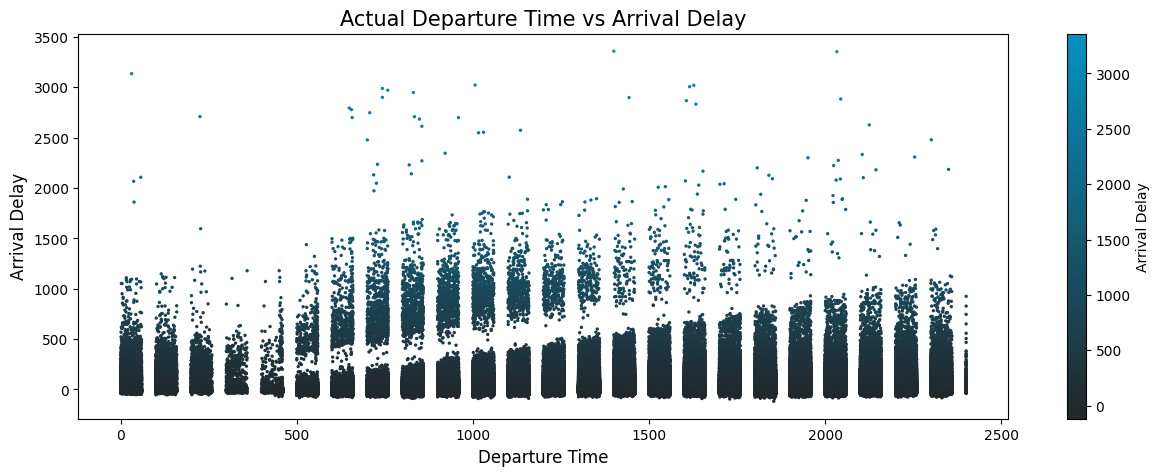

In [39]:
# dep_time vs arr_delay
plot_scatter(df_flights['dep_time'], df_flights['arr_delay'], 'Actual Departure Time vs Arrival Delay', 'Departure Time', 'Arrival Delay')

- Similar to the above graph , there is a trend towards longer delays as the day progresses. Arrival delays are shorter for flights leaving early and longer for flights leaving later.



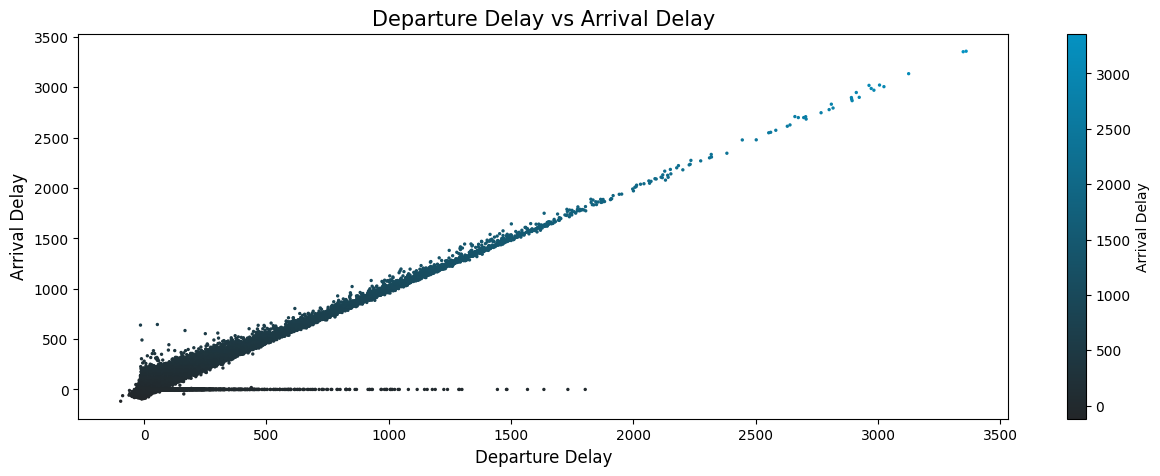

In [40]:
plot_scatter(df_flights ['dep_delay'], df_flights['arr_delay'], 'Departure Delay vs Arrival Delay', 'Departure Delay', 'Arrival Delay')

 - There is a positive linear trend; as departure delay increases, arrival delay also increases. This suggests that departure delays contribute significantly to arrival delays, which is logical, since flights do not usually recover much time in the air.

- On the other hand, we can see at the bottom a straight line that shows us the flights that depart late but arrive on time.

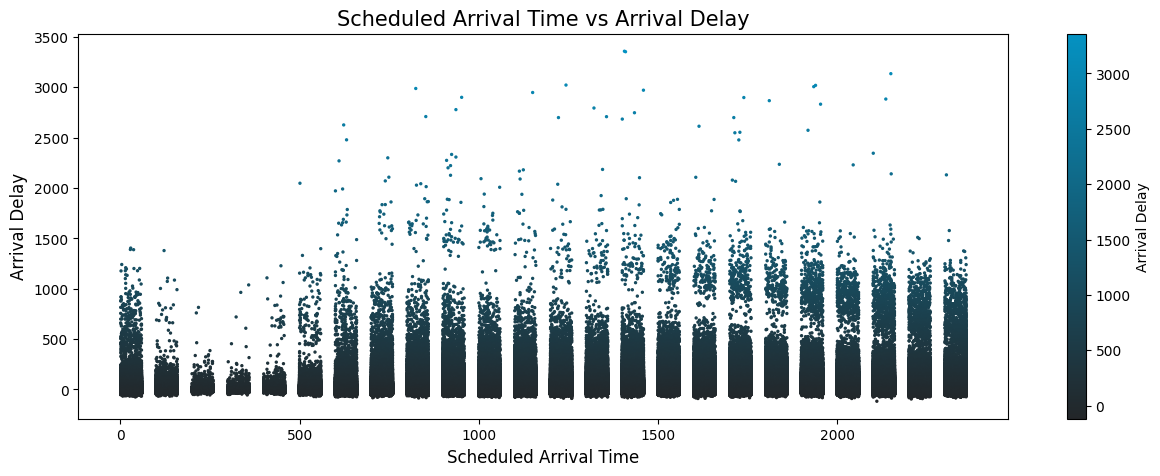

In [41]:
# sched_arr_time vs arr_delay
plot_scatter(df_flights['crs_arr_time'], df_flights['arr_delay'], 'Scheduled Arrival Time vs Arrival Delay', 'Scheduled Arrival Time', 'Arrival Delay')

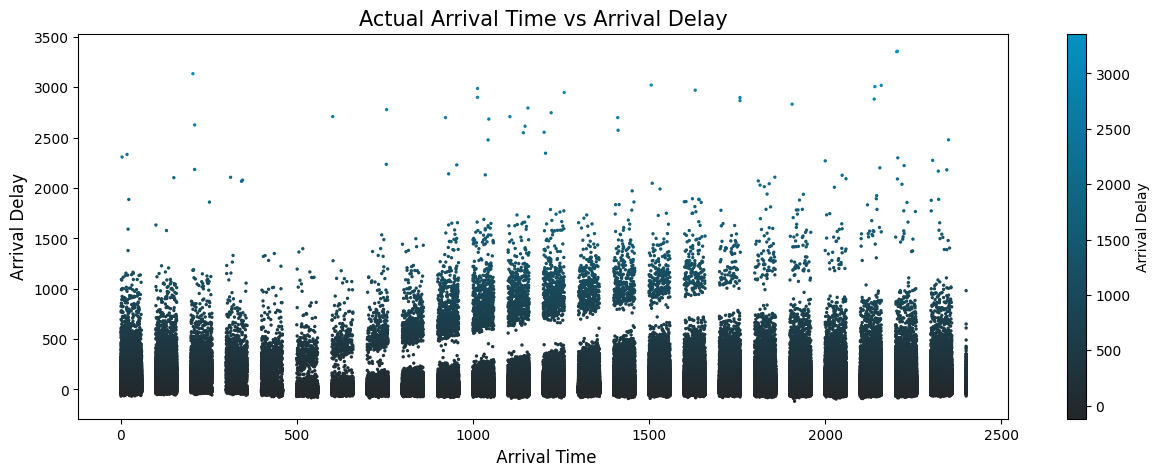

In [42]:
# sched_arr_time vs arr_delay
plot_scatter(df_flights['arr_time'], df_flights['arr_delay'], 'Actual Arrival Time vs Arrival Delay', ' Arrival Time', 'Arrival Delay')

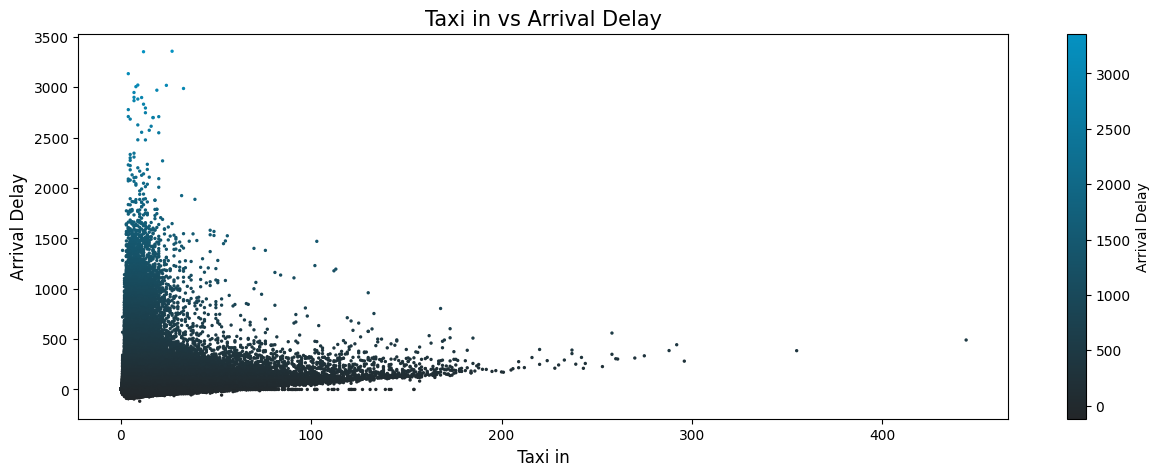

In [52]:
# sched_arr_time vs arr_delay
plot_scatter(df_flights['taxi_in'], df_flights['arr_delay'], 'Taxi in vs Arrival Delay', ' Taxi in ', 'Arrival Delay')

-  Most of the points are concentrated in the lower left, suggesting that __'Taxi in'__ has less influence on very long delays.


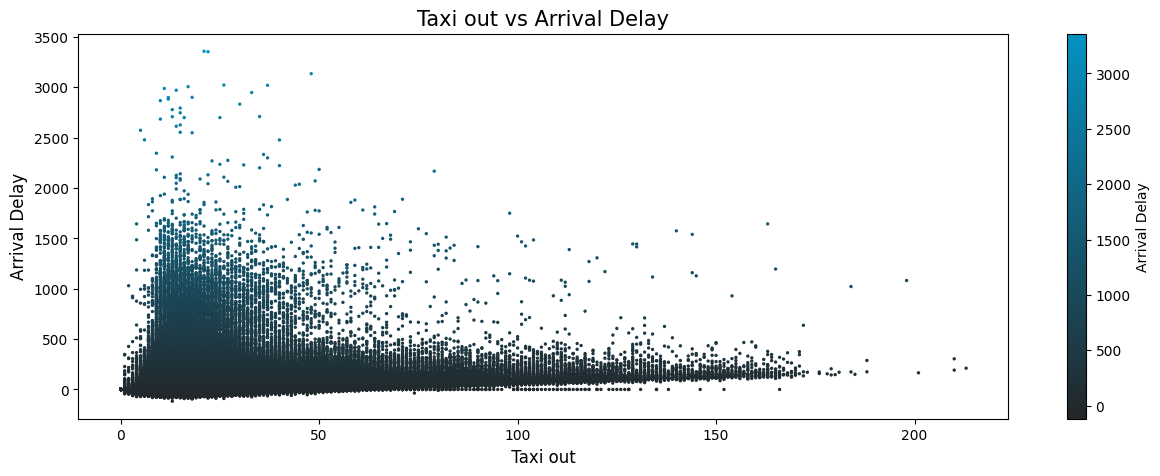

In [52]:
# taxi out vs arr_delay
plot_scatter(df_flights['taxi_out'], df_flights['arr_delay'], 'Taxi out vs Arrival Delay', ' Taxi out ', 'Arrival Delay')

  - There is a noticeable dispersion in the first 50 minutes, where arrival delays tend to vary significantly.
  


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 3.3 |</span><span style='color:#0492C2; font-size:40%' > OUTLIER TREATMENT |

Outliers are values that stand out significantly from the rest of the data (representing unusual or extreme cases) . In analysis, outliers can be problematic because they can disproportionately affect the model's predictions.

In our air flight delay dataset, these outliers correspond to extreamly long delays. These delays are not errors, is just exceptions that happen on our daily basis. Therefore, we don't want to simply remove them from our data. However, we also don't want these outliers to overly influence our model. To address this, we could apply a Box-Cox transformation, which modifies the data to reduce the impact of extreme values without eliminating them.

Although all the data analysis are sensitive to outliers, we want the model to capture insights from all parts of our data, including the extremes

<a id="CONTRAST"></a>
# <p style="background-color:#0A1172; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 4 | CONTRAST HYPOTESIS</p>


__'1. Hypotesis - Flights'__
- The most populated cities in the US are New York, Los Angeles and Chicago in that order. The cities with the greatest number of flights should be those 3.


                    City  Percentage
0            Chicago, IL    5.026032
1            Atlanta, GA    4.831829
2  Dallas/Fort Worth, TX    4.377753
3             Denver, CO    4.296223
4           New York, NY    4.044123
5          Charlotte, NC    3.051005
6            Phoenix, AZ    2.866248
7         Washington, DC    2.750888
8        Los Angeles, CA    2.723788
9          Las Vegas, NV    2.678083


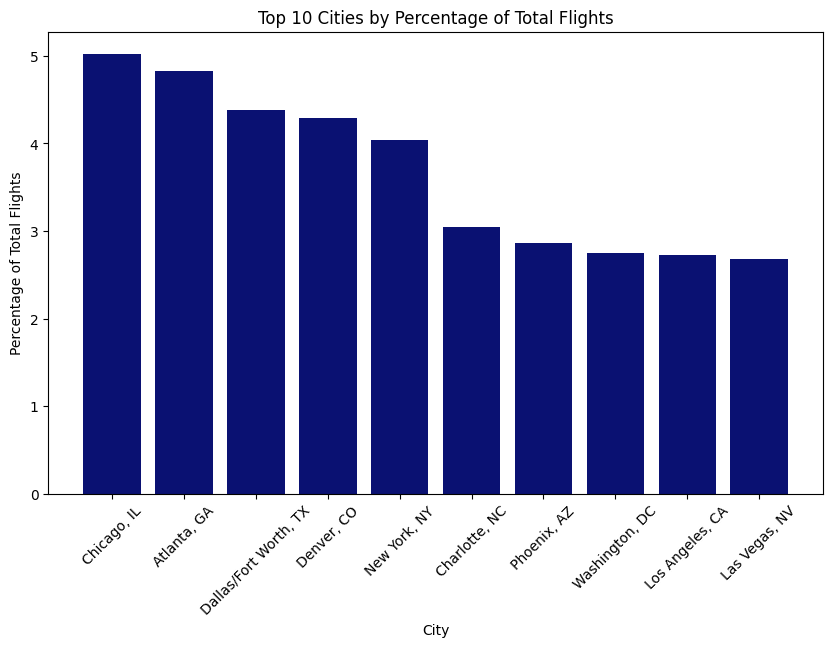

In [53]:


# Percentage of flights by city
city_counts = df_flights['origin_city_name'].value_counts()
city_percentages = (city_counts / city_counts.sum()) * 100

top_10_cities = city_percentages.head(10)
top_10_cities_df = top_10_cities.reset_index()
top_10_cities_df.columns = ['City', 'Percentage']
print(top_10_cities_df)

plt.figure(figsize=(10, 6))
plt.bar(top_10_cities_df['City'], top_10_cities_df['Percentage'], color='#0A1172')
plt.xlabel('City')
plt.ylabel('Percentage of Total Flights')
plt.title('Top 10 Cities by Percentage of Total Flights')
plt.xticks(rotation=45)
plt.show()




              City  Percentage
0    La Crosse, WI    0.002109
1  King Salmon, AK    0.001878
2  Springfield, IL    0.001791
3    Pago Pago, TT    0.001705
4  Santa Maria, CA    0.001531
5  Adak Island, AK    0.001502
6       Vernal, UT    0.001502
7         Moab, UT    0.000896
8     Gustavus, AK    0.000867
9   Dillingham, AK    0.000520


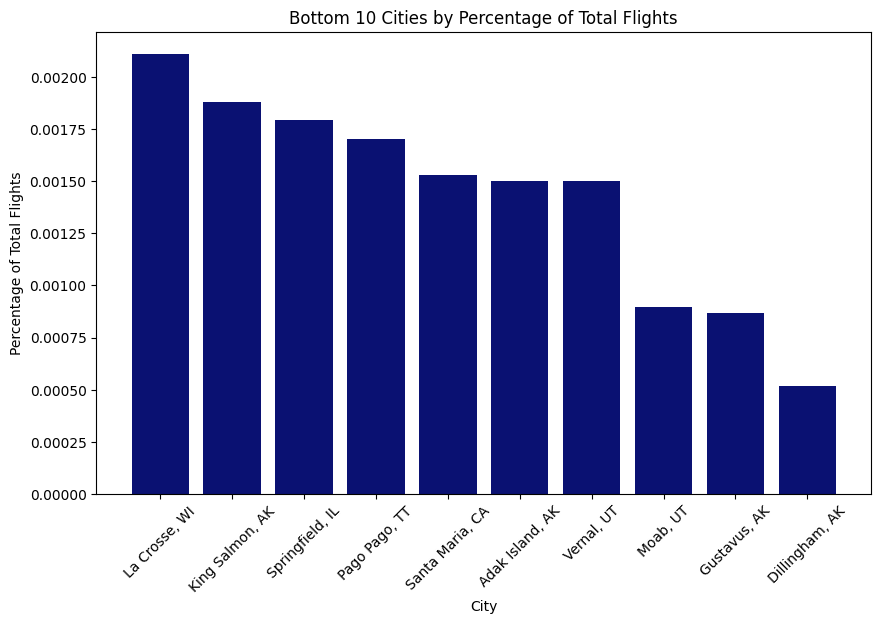

In [54]:
city_counts = df_flights['origin_city_name'].value_counts()

# Percentage of flights by city
city_percentages = (city_counts / city_counts.sum()) * 100

# Top bottom 10 cities by origin
bottom_10_cities = city_percentages.tail(10)  
bottom_10_cities_df = bottom_10_cities.reset_index()
bottom_10_cities_df.columns = ['City', 'Percentage']
print(bottom_10_cities_df)


plt.figure(figsize=(10, 6))
plt.bar(bottom_10_cities_df['City'], bottom_10_cities_df['Percentage'], color='#0A1172')
plt.xlabel('City')
plt.ylabel('Percentage of Total Flights')
plt.title('Bottom 10 Cities by Percentage of Total Flights')
plt.xticks(rotation=45)
plt.show()

- The most populated cities in the US are New York, Los Angeles and Chicago in that order, However the cities with the higher number of air traffic are Chicago, Atlanta and Dallas. On the other side, the top 3 cities with less  air traffic are Moab, Gustavus and Dillingahn.


<a id="CONCLUSIONS"></a>
# <p style="background-color:#0A1172; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 5 | CONCLUSIONS</p>


<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 5.1 |</span><span style='color:#0492C2; font-size:40%' > CONCLUSIONS |</span></b></span><span style='color:#63C5DA; font-size:35%' > Flights</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #4da8cf; font-size:115%; text-align:left">

- __Hypotesis__ Between Friday and Sunday, as is the beginning of the weekend, there should supposedly be a greater number of flights.
- __Analysis__ Weekend is composed of 3 days - Friday, Saturday and Sunday- It is supposed to have a higher number of flights during those days. However on the analysed data we can see that Tuesday and Friday are the highest days in terms of traffc air, while Saturday is the lowest. This discrepancy could be due to various factors, such as increased prices during the weekend or the preference for traveling on weekdays. 
- __Conclusion__ The hypothesis that the weekend has the highest number of flights does not hold true according to the analyzed data. We could analyse further into other factors, such as pricing and travel preferences,and see how might influence flight patterns more significantly. 

<div style="border-radius:10px; padding: 15px; background-color: #4da8cf; font-size:115%; text-align:left">

- __Hypotesis__ The most populated cities in the US are New York, Los Angeles and Chicago in that order. The cities with the greatest number of flights should be those 3.
- __Analysis__  According to the data, the top 3 cities with  the top three cities with the highest number of flights are Chicago, Atlanta, and Dallas. In contrast, the cities with the lowest number of flights are Moab, Gustavus, and Dillingham.
- __Conclusion__ The hypothesis that the cities with the highest number of flights correspond to the most populated cities in the US is not supported by the data. Instead, other factors such as airport hub status, regional connectivity, and airline operations may play a more critical role in determining flight traffic.

<div style="border-radius:10px; padding: 15px; background-color: #4da8cf; font-size:115%; text-align:left">

- __Hypotesis__ June and January should be the months with higher number of flights due to seasonality (winter & christmas season and summer season), while February should be the month with lowest air traffic as there is no festive.
- __Analysis__  Base on the data , the month with higher number of flights is June, and February is the month with the lowest flights
- __Conclusion__ The analysis confirms that June has the highest number of flights, aligning with the expectation of increased air traffic during the summer season. However, while February shows the lowest number of flights, this may not be solely due to a lack of festivities. The shorter duration of February (28 or 29 days) compared to other months likely contributes to its lower flight count. To make a fair comparison, future analyses should standardize the number of days across months, such as comparing flight numbers based on the first 28 days of each month. This approach would provide a more accurate assessment of seasonal trends and ensure that February’s shorter length does not skew the results.

<a id="basic"></a>
# <b><span style='color:#white; font-size:40%' >Step 5.2 |</span><span style='color:#0492C2; font-size:40%' > CONCLUSIONS |</span></b></span><span style='color:#63C5DA; font-size:35%' > Delays</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #4da8cf; font-size:115%; text-align:left">

- __Hypotesis__ Delays are more frequent on the days with higher air traffic
 - __Analysis__  The days with the highest number of delays are Friday, Sunday and Thursday, with Tuesday being the day of the week with the fewest delays. This data is correlated to the level of flight volume on those days. We can confirm from the data we have seen that Friday has the highest number of delays as it is the day with the highest number of flights.
- __Conclusion__ The analysis confirms the hypothesis that delays are more frequent on days with higher air traffic. Days like Friday, Sunday, and Thursday, which have higher flight volumes, also report the most delays. This suggests a direct correlation between the number of flights and the frequency of delays, indicating that managing high traffic efficiently is crucial to minimizing delays.

<div style="border-radius:10px; padding: 15px; background-color: #4da8cf; font-size:115%; text-align:left">

- __Hypotesis__ At the end of the day, flights leave with a higher number of minutes of delay, as delays from other flights are accumulated.
 - __Analysis__  According to the data, there is a trend towards longer delays as the day progresses. Arrival delays are shorter for flights leaving early and longer for flights leaving later.
- __Conclusion__  The data supports the hypothesis that delays increase as the day progresses. The trend underscores the importance of early departures for reducing delay durations and highlights the compounding nature of delays throughout the day.

<div style="border-radius:10px; padding: 15px; background-color: #4da8cf; font-size:115%; text-align:left">

- __Hypotesis__  More than 50% of the flights should have less than 30min. Only exceptional cases such weather delays, nas delay, carrier delay can cause a delay higher than 30min
 - __Analysis__ Data shows that 79% of flights departure have had less than 15 min delay on the departure, while 21% more than 15 in delay. On the arrival delays , we see similar numbers, being 78% for less than 15 min delay and 22% of the flight with more than 15 min delay on the arrival.
- __Conclusion__ The hypothesis is validated, as the data shows that a significant majority of flights (79% of departures and 78% of arrivals) experience delays of less than 15 minutes. This indicates that severe delays are not common and usually stem from exceptional factors like weather, NAS, or carrier-related issues. The results demonstrate that the overall punctuality of flights is relatively high, with only a small percentage of flights experiencing significant delays.

<div style="border-radius:10px; padding: 15px; background-color: #4da8cf; font-size:115%; text-align:left">

- __Hypotesis__ Each airline has different operational or assignment processes. Therefore, there will be companies that have a higher volume of delays than others.
 - __Analysis__ According to the data, airlines with the codes __F9__(Frontier Airlines), __AA__ (American Airlines), __B6__ (JetBlue Airlines), are the top 3 airlines with higher number of arrival delays. On the other hand, __YX__(Republic Airlines), arrives in advance.
- __Conclusion__ The analysis confirms that airlines have varying levels of delays, influenced by their unique operational processes. Frontier Airlines (F9), American Airlines (AA), and JetBlue Airlines (B6) are the top three airlines with the highest number of arrival delays, suggesting potential areas for operational improvements. Conversely, Republic Airlines (YX) often arrives early, indicating more efficient time management. This variation highlights the impact of airline-specific practices on delay performance and suggests that some airlines may benefit from reviewing and optimizing their scheduling and operational strategies.